# **Projet**

---
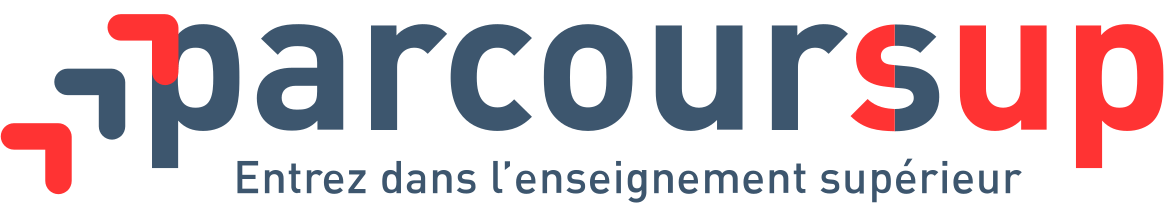


**Analyse du jeu de donnée parcoursup 2020**

https://data.enseignementsup-recherche.gouv.fr/pages/parcoursupdata_2020/?disjunctive.fili&sort=tri


---


# Parametrage du projet

In [1]:
# Lib import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Lib config
pd.set_option('display.max_row', 15)
pd.set_option('display.max_column', 120)
sns.set_style("dark")

In [3]:
# Creation du DF
df_raw = pd.read_csv('/content/drive/MyDrive/Data/1_Projets/Parcours Sup/fr-esr-parcoursup_2020.csv', sep = ';')

# Exploration du dataset

In [4]:
# Dataset shape
print('Dataset shape:\n-', df_raw.shape[0],'Observations\n-', df_raw.shape[1], 'Champs')

Dataset shape:
- 12760 Observations
- 115 Champs


In [5]:
# dtypes
print('types occurence count:')
df_raw.dtypes.value_counts()

types occurence count:


int64      47
float64    46
object     22
dtype: int64

In [6]:
# Exploration des données
df_raw.head()

,session,contrat_etab,cod_uai,g_ea_lib_vx,dep,dep_lib,region_etab_aff,acad_mies,select_form,fili,lib_comp_voe_ins,form_lib_voe_acc,regr_forma,fil_lib_voe_acc,detail_forma,lien_form_psup,g_olocalisation_des_formations,capa_fin,voe_tot,voe_tot_f,nb_voe_pp,nb_voe_pp_internat,nb_voe_pp_bg,nb_voe_pp_bg_brs,nb_voe_pp_bt,nb_voe_pp_bt_brs,nb_voe_pp_bp,nb_voe_pp_bp_brs,nb_voe_pp_at,nb_voe_pc,nb_voe_pc_bg,nb_voe_pc_bt,nb_voe_pc_bp,nb_voe_pc_at,nb_cla_pp,nb_cla_pc,nb_cla_pp_internat,nb_cla_pp_pasinternat,nb_cla_pp_bg,nb_cla_pp_bg_brs,nb_cla_pp_bt,nb_cla_pp_bt_brs,nb_cla_pp_bp,nb_cla_pp_bp_brs,nb_cla_pp_at,prop_tot,acc_tot,acc_tot_f,acc_pp,acc_pc,acc_debutpp,acc_datebac,acc_finpp,acc_internat,acc_brs,acc_neobac,acc_bg,acc_bt,acc_bp,acc_at,acc_mention_nonrenseignee,acc_sansmention,acc_ab,acc_b,acc_tb,acc_bg_mention,acc_bt_mention,acc_bp_mention,acc_term,acc_term_f,acc_aca_orig,acc_aca_orig_idf,pct_acc_debutpp,pct_acc_datebac,pct_acc_finpp,pct_f,pct_aca_orig,pct_aca_orig_idf,pct_etab_orig,pct_bours,pct_neobac,pct_mention_nonrenseignee,pct_sansmention,pct_ab,pct_b,pct_tb,pct_bg,pct_bg_mention,pct_bt,pct_bt_mention,pct_bp,pct_bp_mention,prop_tot_bg,prop_tot_bg_brs,prop_tot_bt,prop_tot_bt_brs,prop_tot_bp,prop_tot_bp_brs,prop_tot_at,lib_grp1,ran_grp1,lib_grp2,ran_grp2,lib_grp3,ran_grp3,lib_grp4,ran_grp4,lib_grp5,ran_grp5,taux_adm_psup,taux_adm_psup_pro,taux_adm_psup_gen,taux_adm_psup_techno,tri,cod_aff_form
0,2020,Public,0161051F,IFSI - Croix-Rouge Française - Angoulême,16,Charente,Nouvelle-Aquitaine,Poitiers,formation selective,IFSI,Regroupement d'IFSI Université Poitiers - D.E ...,D.E secteur sanitaire,NaN,D.E Infirmier,NaN,https://dossier.parcoursup.fr/Candidat/carte?A...,"45.6181,0.1137",120.0,3163,2693,3163,NaN,610,86,589,135,265,93,1699,0,0,0,0,0,2017,0,NaN,NaN,487,62,360,69,156,42,1014,918,124,109,124,0,8.0,88.0,102.0,NaN,19,54,18,17,19,70,0,10,15,19,10,10,16,18,NaN,NaN,33,33,6.45,70.97,82.26,87.90,61.11,61.11,NaN,35.19,43.55,0.0,18.518519,27.777778,35.185185,18.518519,33.333333,18.52,31.481481,29.63,35.185185,33.33,238.0,34.0,165.0,44.0,75.0,30.0,440.0,Tous les candidats,1945.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.0,23.0,57.0,19.0,3_Autres formations,23210
1,2020,Public,0171327A,IFSI CH Saintonge,17,Charente-Maritime,Nouvelle-Aquitaine,Poitiers,formation selective,IFSI,Regroupement d'IFSI Université Poitiers - D.E ...,D.E secteur sanitaire,NaN,D.E Infirmier,NaN,https://dossier.parcoursup.fr/Candidat/carte?A...,"45.747,-0.65182",49.0,3109,2655,3109,NaN,590,77,616,125,249,72,1654,0,0,0,0,0,2051,0,NaN,NaN,482,55,389,63,159,39,1021,616,56,51,56,0,1.0,38.0,49.0,NaN,8,31,15,7,9,25,0,7,12,9,3,9,7,8,NaN,NaN,23,23,1.79,67.86,87.50,91.07,74.19,74.19,NaN,25.81,55.36,0.0,22.580645,38.709677,29.032258,9.677419,48.387097,29.03,22.580645,22.58,29.032258,25.81,158.0,22.0,124.0,32.0,37.0,12.0,297.0,Tous les candidats,1795.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0,21.0,55.0,21.0,3_Autres formations,23212
2,2020,Public,0681689S,IFSI Rouffach,68,Haut-Rhin,Grand Est,Strasbourg,formation selective,IFSI,Regroupement d'IFSI Université Strasbourg - D....,D.E secteur sanitaire,NaN,D.E Infirmier,NaN,https://dossier.parcoursup.fr/Candidat/carte?A...,"47.9513,7.28818",41.0,2412,2064,2412,NaN,399,68,511,160,251,91,1251,0,0,0,0,0,2178,0,NaN,NaN,393,66,459,137,209,67,1117,451,45,41,45,0,5.0,31.0,37.0,NaN,3,26,8,11,7,19,0,1,10,9,6,7,11,7,NaN,NaN,25,25,11.11,68.89,82.22,91.11,96.15,96.15,NaN,11.54,57.78,0.0,3.846154,38.461538,34.615385,23.076923,30.769231,26.92,42.307692,42.31,26.923077,26.92,107.0,18.0,102.0,27.0,34.0,11.0,208.0,Tous les candidats,1686.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.0,24.0,44.0,31.0,3_Autres formations,23246
3,2020,Public,0090559J,IFSI CH Int Val Ariège,09,Ariège,Occitanie,Toulouse,formation selective,IFSI,Regroupement d'IFSI Université Toulouse - D.E ...,D.E secteur sanitaire,NaN,D.E Infirmier,NaN,https://dossier.parcoursup.fr/Candidat/carte?A...,"43.1127,1.60858",61.0,5050,4254,5050,NaN,721,128,878,247,530,193,2921,0,0,0,0,0,3927,0,NaN,NaN,627,97,71

# Création d'un nouveau DF avec les colonnes utiles

Suppression des colonnes inutiles

In [7]:
# Selection des champs utiles
df = df_raw[['contrat_etab',
        'g_ea_lib_vx',
        'dep',
        'dep_lib',
        'region_etab_aff',
        'select_form',
        'acad_mies',
        'fili',
        'lib_comp_voe_ins',
        'form_lib_voe_acc',
        'fil_lib_voe_acc',
        'detail_forma',
        'g_olocalisation_des_formations',
        'capa_fin',
        'voe_tot',
        'voe_tot_f',
        'prop_tot',
        'acc_tot',
        'acc_tot_f',
        'acc_brs',
        'acc_bg',
        'acc_bt',
        'acc_bp',
        'acc_at',
        'acc_aca_orig',
        'acc_sansmention',
        'acc_ab',
        'acc_b',
        'acc_tb',
        'taux_adm_psup',
        'tri',
        'cod_aff_form']]

In [8]:
# Renommage des colonnes

# Dict des noms
fields_Cleaning_dict = {
    'contrat_etab' : 'Public_Prive',
    'g_ea_lib_vx': 'Nom_Etablissement',
    'dep' : 'Num_Departement',
    'dep_lib' : 'Nom_Departement',
    'region_etab_aff' : 'Region_Etablissement',
    'select_form' : 'Type_Selection',
    'acad_mies' : 'Academie',
    'fili' : 'Filliere',
    'lib_comp_voe_ins' : 'Nom_Complet_Formation',
    'form_lib_voe_acc' : 'Niveau_Formation',
    'fil_lib_voe_acc' : 'Domaine_Formation',
    'detail_forma' : 'Commentaire_Formation',
    'g_olocalisation_des_formations' : 'Coord_GPS',
    'capa_fin' : 'Capacite',
    'voe_tot': 'Voeux_Total',
    'voe_tot_f' : 'Vœux_Total_F',
    'prop_tot' : 'Proposition_Admission',
    'acc_tot' : 'Admis_Total',
    'acc_tot_f' : 'Admis_F',
    'acc_brs' : 'Admis_Boursier',
    'acc_bg' : 'Admis_Bac_General',
    'acc_bt' : 'Admis_Bac_Tech',
    'acc_bp' : 'Admis_Bac_Pro',
    'acc_at' : 'Admis_Autres',
    'acc_aca_orig' : 'Admis_Academie',
    'acc_sansmention' : 'Admis_Mention_Null',
    'acc_ab' : 'Admis_Mention_AB',
    'acc_b' : 'Admis_Mention_B',
    'acc_tb' : 'Admis_Mention_TB',
    'taux_adm_psup' : 'Taux_Acces',
    'tri' : 'Type_Etablissement',
    'cod_aff_form' : 'ID'
    }

# Renommage avec le dict
df.rename(columns = fields_Cleaning_dict, inplace = True)

<ipython-input-8-7c4c480e053f>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns = fields_Cleaning_dict, inplace = True)


In [9]:
# Dataset shape
print('Nouveau dataset shape:\n-', df.shape[0],'Observations\n-', df.shape[1], 'Champs')

Nouveau dataset shape:
- 12760 Observations
- 32 Champs


# Contrôle et nettoyage des données



## Checklist qualité:

- Valeurs manquantes
- Types
- Outliers
- Doublons

## Valeurs manquantes

In [10]:
# Nombre de valeurs manquante dans les colonnes
print("Champs avec des valeurs manquantes et leur nombre:\n=============================")
df[df.columns[df.isna().sum() != 0]].isna().sum()

Champs avec des valeurs manquantes et leur nombre:


Commentaire_Formation    9361
Coord_GPS                 179
Capacite                    1
Taux_Acces                234
dtype: int64

Resultats:
- ✅Commentaire_Formation ⇒ C'est un champs optionnel
- ❌Coord_GPS ⇒ Chaque établissement doit avoir des coordonées GPS
- ❌Capacite ⇒ Si une formation n'as pas d'étudiant, le champs doit être rempli a 0 et pas NaN
- ❌Taux_Acces ⇒ Analyse complémentaire necessaire

### 🚏 Corriger les coordonées GPS manquantes sur certaines formations

Méthode par imputation:
- Création d'une BDD avec les établissements unique et leurs coordonées
- Merge de la BDD avec le DF pour remplir les valeurs manquantes
- Suppression des doublons liés au merge

In [11]:
# Vérification des observations sans GPS
df.loc[df['Coord_GPS'].isna(), ['Nom_Etablissement', 'Coord_GPS']]

,Nom_Etablissement,Coord_GPS
96,LYCEE POLYVALENT DE MAMOUDZOU NORD,NaN
239,Lycée professionnel Lino Ventura,NaN
242,Lycée professionnel Maria Goretti,NaN
243,Université du littoral - Site de Dunkerque,NaN
244,Université de Limoges,NaN
...,...,...
12682,Lycée Joseph-Marie Carriat,NaN
12683,Lycée Juliette Récamier,NaN
12684,Lycée professionnel Jean Moulin,NaN
12685,Lycée polyvalent Raphaël Elizé,NaN


Création de la BDD GPS

In [12]:
# Création de la BDD GPS
gps_db = df.loc[df['Coord_GPS'].notna(), ['Nom_Etablissement', 'Coord_GPS']].drop_duplicates()

In [13]:
# Séparation de la colonne GPS pour extraire les X et Y dans des champs séparés
gps_db[['GPS_X', 'GPS_Y']] = df['Coord_GPS'].str.split(',', 1, expand=True)
gps_db

<ipython-input-13-9e1b8fb21173>:2: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  gps_db[['GPS_X', 'GPS_Y']] = df['Coord_GPS'].str.split(',', 1, expand=True)


,Nom_Etablissement,Coord_GPS,GPS_X,GPS_Y
0,IFSI - Croix-Rouge Française - Angoulême,"45.6181,0.1137",45.6181,0.1137
1,IFSI CH Saintonge,"45.747,-0.65182",45.747,-0.65182
2,IFSI Rouffach,"47.9513,7.28818",47.9513,7.28818
3,IFSI CH Int Val Ariège,"43.1127,1.60858",43.1127,1.60858
4,IFSI CHR Orléans,"47.9079,1.88604",47.9079,1.88604
...,...,...,...,...
12755,IFSI CHU Nimes,"43.85009,4.36643",43.85009,4.36643
12756,IFSI CH Perpignan,"42.7046,2.88082",42.7046,2.88082
12757,IFSI Forbach,"49.1834,6.91117",49.1834,6.91117
12758,IFSI CHU NANTES,"47.1983,-1.53137",47.1983,-1.53137


In [14]:
# Merge
df = pd.merge(df, gps_db, on = 'Nom_Etablissement', how = 'left')

# Suppression des doublons
df = df.drop_duplicates(subset = 'ID')

# Suppressions des colonnes inutiles
df.drop(columns = ['Coord_GPS_x', 'Coord_GPS_y'], inplace = True)

In [15]:
# Vérification des NaN restants
df.loc[df['GPS_X'].isna(), ['Nom_Etablissement', 'GPS_X']]

,Nom_Etablissement,GPS_X
1652,Lycée professionnel Maria Goretti,NaN
14970,Lycée professionnel du Hainaut,NaN
14995,Lycée professionnel Gabriel Voisin,NaN
26142,Lycée professionnel des Métiers Maria Casares,NaN
26143,Lycée professionnel des Métiers LA VISTE,NaN
...,...,...
70346,Lycée professionnel Louis Martin Bret,NaN
70350,Université Paris-Saclay,NaN
70360,Lycée professionnel Voilin,NaN
81035,Lycée professionnel Louise de Bettignies,NaN


Il reste 27 observations sans GPS ➡ 0.2% du DF donc je les laisse en NaN

### Capacite

In [16]:
# check
df.loc[df['Capacite'].isna(), ['Nom_Etablissement', 'Nom_Complet_Formation', 'Capacite', 'Voeux_Total', 'Admis_Total']]

,Nom_Etablissement,Nom_Complet_Formation,Capacite,Voeux_Total,Admis_Total
65108,Lycée Alexis Monteil,Lycée Alexis Monteil - Mention complémentaire ...,NaN,0,0


La capacité est a 0 et aucun voeux.
Observation à supprimer

In [17]:
# Suppression
df.drop(axis = 0, index = 65108, inplace = True)

In [18]:
# Vérification de la suppression
df['Capacite'].isna().sum()

0

### Taux acces

Un taux d'accès est compris en 0 et 100 mais ne peut pas être NaN

In [19]:
# Vérification des NaN
df.loc[df['Taux_Acces'].isna()].head()

,Public_Prive,Nom_Etablissement,Num_Departement,Nom_Departement,Region_Etablissement,Type_Selection,Academie,Filliere,Nom_Complet_Formation,Niveau_Formation,Domaine_Formation,Commentaire_Formation,Capacite,Voeux_Total,Vœux_Total_F,Proposition_Admission,Admis_Total,Admis_F,Admis_Boursier,Admis_Bac_General,Admis_Bac_Tech,Admis_Bac_Pro,Admis_Autres,Admis_Academie,Admis_Mention_Null,Admis_Mention_AB,Admis_Mention_B,Admis_Mention_TB,Taux_Acces,Type_Etablissement,ID,GPS_X,GPS_Y
897,Public,LYCEE POLYVALENT DE MAMOUDZOU NORD,976,Mayotte,Mayotte,formation selective,Mayotte,Autre formation,LYCEE POLYVALENT DE MAMOUDZOU NORD - Mention c...,Mention complémentaire,FCIL classe passerelle BTS option service,NaN,36.0,0,0,43,35,20,25,0,18,16,1,33,23,10,1,0,NaN,3_Autres formations,24225,-12.7668,45.225
1649,Public,Lycée professionnel Lino Ventura,77,Seine-et-Marne,Ile-de-France,formation selective,Créteil,Autre formation,Lycée professionnel Lino Ventura - Mention com...,Mention complémentaire,FCIL classe passerelle BTS,NaN,30.0,0,0,98,29,23,15,0,10,19,0,28,27,2,0,0,NaN,3_Autres formations,25596,48.759,2.6923
1652,Privé sous contrat d'association,Lycée professionnel Maria Goretti,59,Nord,Hauts-de-France,formation selective,Lille,Autre formation,Lycée professionnel Maria Goretti - Mention co...,Mention complémentaire,FCIL classe passerelle BTS,NaN,30.0,0,0,24,3,0,1,0,1,2,0,3,3,0,0,0,NaN,3_Autres formations,25707,NaN,NaN
1653,Public,Université du littoral - Site de Dunkerque,59,Nord,Hauts-de-France,formation selective,Lille,Autre formation,Université du littoral - Site de Dunkerque - D...,Diplôme d'Université,Diplôme d'Université CAES,DU Avenir,40.0,0,0,60,5,0,2,1,1,2,1,4,3,1,0,0,NaN,3_Autres formations,25715,51.039,2.37214
1654,Public,Université de Limoges,87,Haute-Vienne,Nouvelle-Aquitaine,formation selective,Limoges,Autre formation,Université de Limoges - Diplôme d'Université C...,Diplôme d'Université,Diplôme d'Université CAES,Dispositif rebond,30.0,0,0,21,3,3,0,0,2,1,0,3,1,2,0,0,NaN,3_Autres formations,25728,45.82458,1.2637


Remplacement des NaN par 0

Un taux d'accès a 0% veut dire que soit:
- aucun candidat n'a fait de voeux
- si un il y a des voeux, l'établissement n'as pas fait de proposition sur ces voeux



In [20]:
# Remplacement des NaN part la valeur 0
df['Taux_Acces'].fillna(0, inplace = True)
df.loc[df['Taux_Acces'].isna()].head()

,Public_Prive,Nom_Etablissement,Num_Departement,Nom_Departement,Region_Etablissement,Type_Selection,Academie,Filliere,Nom_Complet_Formation,Niveau_Formation,Domaine_Formation,Commentaire_Formation,Capacite,Voeux_Total,Vœux_Total_F,Proposition_Admission,Admis_Total,Admis_F,Admis_Boursier,Admis_Bac_General,Admis_Bac_Tech,Admis_Bac_Pro,Admis_Autres,Admis_Academie,Admis_Mention_Null,Admis_Mention_AB,Admis_Mention_B,Admis_Mention_TB,Taux_Acces,Type_Etablissement,ID,GPS_X,GPS_Y


## Types

In [21]:
# Overview
df.dtypes.value_counts()

int64      16
object     15
float64     2
dtype: int64

In [22]:
# details
df.dtypes

Public_Prive             object
Nom_Etablissement        object
Num_Departement          object
Nom_Departement          object
Region_Etablissement     object
                         ...   
Taux_Acces              float64
Type_Etablissement       object
ID                        int64
GPS_X                    object
GPS_Y                    object
Length: 33, dtype: object

**Typecasting**

Float en Int ➡ Capacite; Candidats_Prop

Int en Object ➡ ID

Object en Float ➡ GPS_X & Y

In [23]:
# Typecast
df['Capacite'] = df['Capacite'].astype(int)
df['ID'] = df['ID'].astype(object)
df[['GPS_X','GPS_Y']] = df[['GPS_X','GPS_Y']].astype(float)

# Check
df.dtypes

Public_Prive             object
Nom_Etablissement        object
Num_Departement          object
Nom_Departement          object
Region_Etablissement     object
                         ...   
Taux_Acces              float64
Type_Etablissement       object
ID                       object
GPS_X                   float64
GPS_Y                   float64
Length: 33, dtype: object

## Outliers

Génération de boxplots pour toutes les variables quantitative afin de vérifier si présence d'outliers

<Figure size 640x480 with 0 Axes>

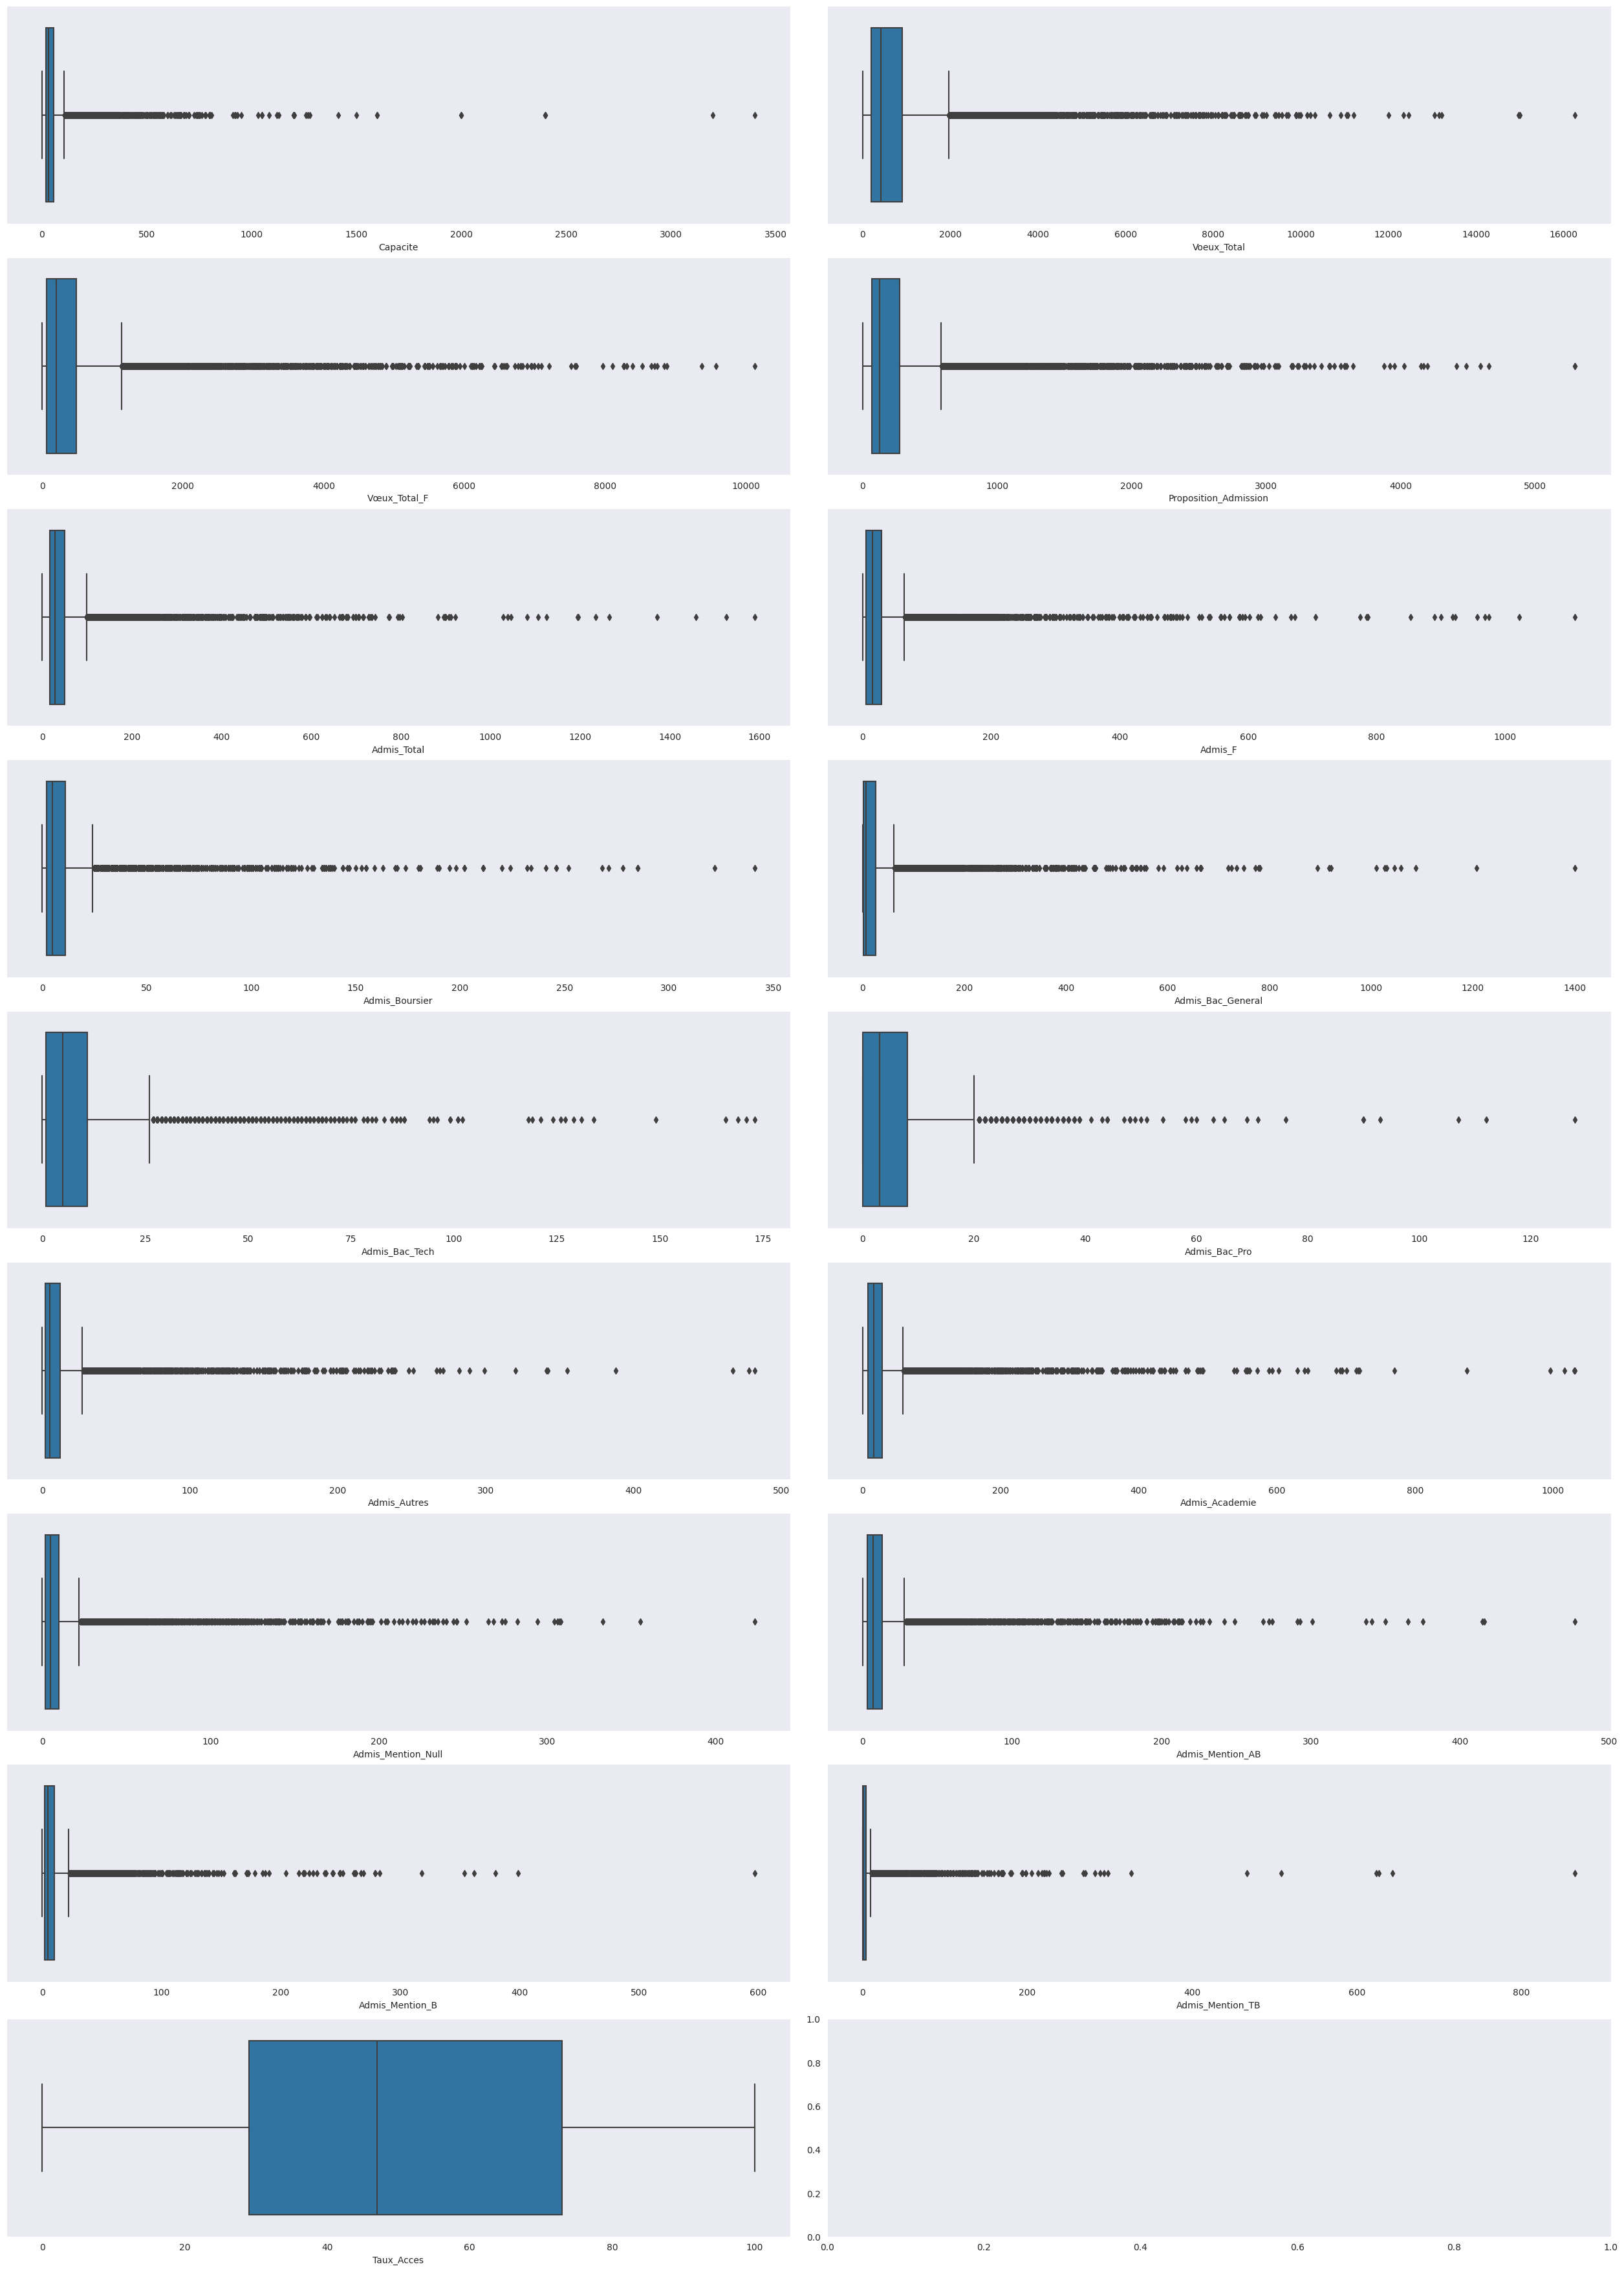

In [24]:
# Outliers subset
outliers = df.select_dtypes(exclude = 'object')
outliers.drop(columns = ['GPS_X', 'GPS_Y'], axis= 1, inplace = True)

plt.figure()
plt.subplots(9,2, figsize = (25,35),layout= 'constrained')

i = 1
for c in outliers:
  plt.subplot(9,2,i)
  sns.boxplot(x = outliers[c])
  i += 1

plt.show()

**Insights**

Les outliers présents ont des valeurs cohérentes

## Doublons

In [25]:
# Check des doublons
df[df.duplicated(keep = False, subset = 'ID')]

,Public_Prive,Nom_Etablissement,Num_Departement,Nom_Departement,Region_Etablissement,Type_Selection,Academie,Filliere,Nom_Complet_Formation,Niveau_Formation,Domaine_Formation,Commentaire_Formation,Capacite,Voeux_Total,Vœux_Total_F,Proposition_Admission,Admis_Total,Admis_F,Admis_Boursier,Admis_Bac_General,Admis_Bac_Tech,Admis_Bac_Pro,Admis_Autres,Admis_Academie,Admis_Mention_Null,Admis_Mention_AB,Admis_Mention_B,Admis_Mention_TB,Taux_Acces,Type_Etablissement,ID,GPS_X,GPS_Y


Pas de doublons sur les formations

# Data profiling

## Type d'éblissements


ETABLISSEMENTS =  3395 




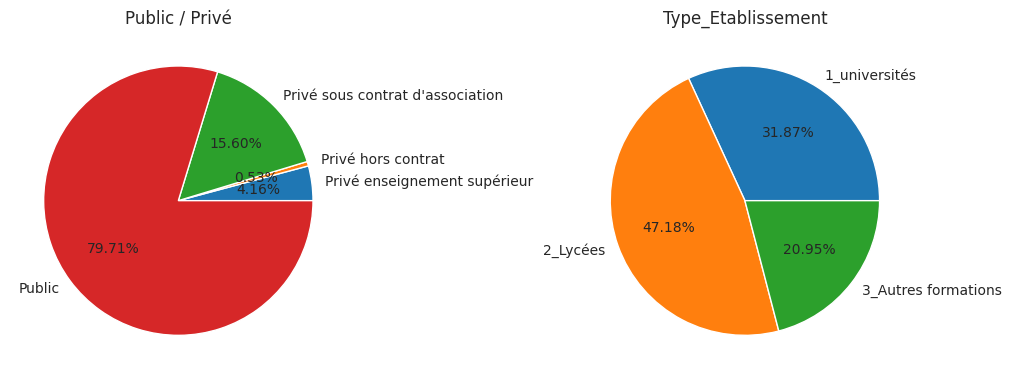

In [26]:
# Comptage des établissements
print("\nETABLISSEMENTS = ", df['Nom_Etablissement'].nunique(), "\n\n")

# Création de la figure
plt.figure(figsize = (10,20), layout= 'constrained')

# Creation subplot 1
plt.subplot(1,2,1)
plt.pie(x = df.groupby(['Public_Prive']).size(), autopct = '%.2f%%', labels = ['Privé enseignement supérieur', 'Privé hors contrat', "Privé sous contrat d'association", 'Public'])
plt.title("Public / Privé")

# Creation subplot 2
plt.subplot(1,2,2)
plt.pie(x = df.groupby(['Type_Etablissement']).size(), autopct = '%.2f%%', labels = ['1_universités','2_Lycées', '3_Autres formations'])
plt.title("Type_Etablissement")

# Affichage
plt.show()

**Insights**

- La majorité des formations sont dispensées en établissement public
- Quasiment la moitié des formations sont dispensées en lycée. La raison est que le BTS est la formation la plus demandée et les CPGE sont également dispensé en lycée.

## Candidats

### Overall

In [27]:
# Quantification générale
candidats_uniques = 985538
print('============= Somme =============\n')

print(df[['Voeux_Total', 'Proposition_Admission', 'Admis_Total', 'Capacite']].sum())
print('\n')
#print('=================================\n')
print(f'Il y a {candidats_uniques} candidats ayant fait au moins un voeu\n\nmoyennes par candidats:')
print(df[['Voeux_Total', 'Proposition_Admission', 'Admis_Total']].sum() / candidats_uniques)

============= Somme =============

Voeux_Total              10583484
Proposition_Admission     3412244
Admis_Total                673692
Capacite                   752094
dtype: int64


Il y a 985538 candidats ayant fait au moins un voeu

moyennes par candidats:
Voeux_Total              10.738788
Proposition_Admission     3.462316
Admis_Total               0.683578
dtype: float64


**Insights**

- 985 538 candidats unique
- Un candidat à fait 10.73 voeux en moyenne. Le nombre de voeux maxi est de 10 avec possibilité de sous voeux
- Un candidat à reçu en moyenne 3.46 propositions
- 673 692 candidats ont été admis soit 68%.
- Le nombre d'admis ne permet pas de couvrir à 100% la capacité d'acceuil. Il reste 78 402 places libres soit **89%** de taux de remplissage



### Provenance Bac

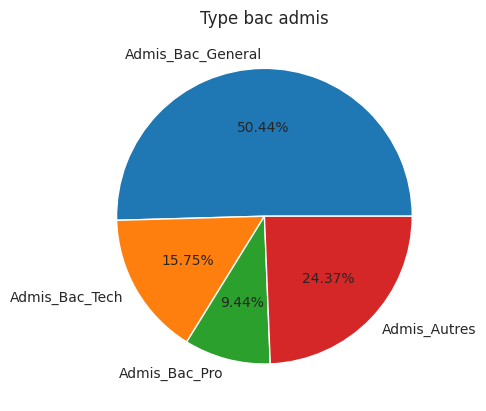

In [28]:
# Création d'un sous DF avec les champs utiles
bac = df.iloc[: , 19:23]

# Calcul de la somme générale
total_bac = bac.sum().sum()

# Pct du total
bac_pie = bac.sum() / total_bac * 100

# Pie chart
plt.pie(x = bac_pie, autopct = '%.2f%%', labels = bac.columns)
plt.title('Type bac admis')
plt.show()

### Boursiers

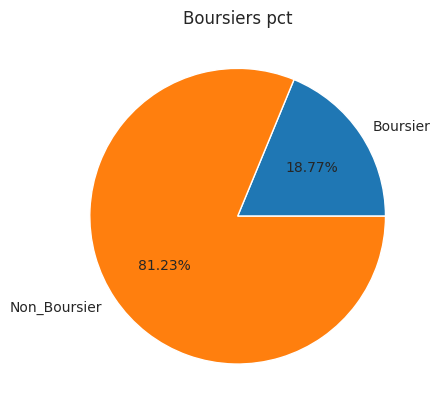

In [29]:
# Création d'un sous DF avec les champs utiles
brs = df.loc[: ,['Admis_Total', 'Admis_Boursier']]
brs.rename(columns={'Admis_Total' : 'Total', 'Admis_Boursier' : 'Boursier'}, inplace = True)
brs['Non_Boursier'] = brs['Total'] - brs['Boursier']
brs.drop(columns = 'Total', inplace = True)

# Calcul de la somme générale
total_brs = brs.sum().sum()

# Pct du total
brs_pie = brs.sum() / total_brs * 100

# Pie chart
plt.pie(x = brs_pie, autopct = '%.2f%%', labels = brs.columns)
plt.title('Boursiers pct')
plt.show()

### Parité

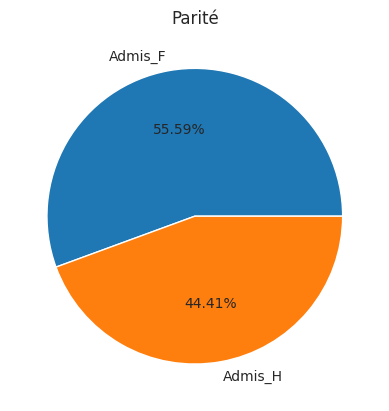

In [30]:
# Création d'un sous DF avec les champs utiles
par = df.loc[: ,['Admis_Total', 'Admis_F']]
par.rename(columns={'Admis_Total' : 'Total', 'Admis_F' : 'Admis_F'}, inplace = True)
par['Admis_H'] = par['Total'] - par['Admis_F']
par.drop(columns = 'Total', inplace = True)

# Calcul de la somme générale
total_par = par.sum().sum()

# Pct du total
par_pie = par.sum() / total_par * 100

# Pie chart
plt.pie(x = par_pie, autopct = '%.2f%%', labels = par.columns)
plt.title('Parité')
plt.show()

**Insights**

Il y a plus de femmes que d'hommes admis

### Mentions

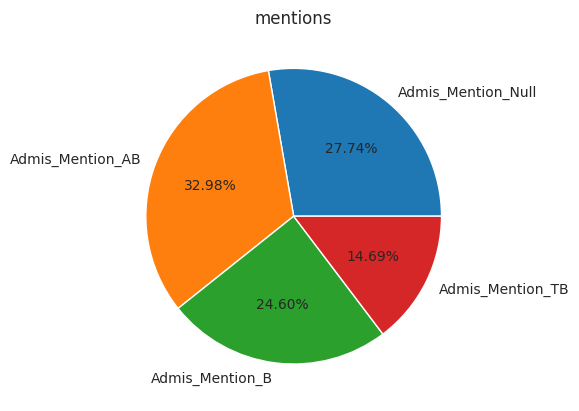

In [31]:
# Création d'un sous DF avec les champs utiles
mention = df.iloc[: , 24:28]

# Calcul de la somme générale
total_m = mention.sum().sum()

# Pct du total
mention_pie = mention.sum() / total_m * 100

# Pie chart
plt.pie(x = mention_pie, autopct = '%.2f%%', labels = mention.columns)
plt.title('mentions')
plt.show()


**Insights**

Les mentions au bac sont plûtot équilibrée

### Changement d'academie

In [32]:
# Creation d'un subset
aca = df[['Admis_Total', 'Admis_Academie']]

# Calcul du ratio
pct = round((aca['Admis_Academie'].sum() / aca['Admis_Total'].sum())*100)

print("Il y a", aca['Admis_Academie'].sum(), "néo bachelier qui ne changent pas d'académie")
print("Ce qui représente", pct, "% des admis")

Il y a 366506 néo bachelier qui ne changent pas d'académie
Ce qui représente 54 % des admis


## Diplomes

Formations

In [33]:
# check
print("\nTOTAL Formations = ", df['Nom_Complet_Formation'].nunique(), "\n")


TOTAL Formations =  11124 



### Diplomes les plus populaires

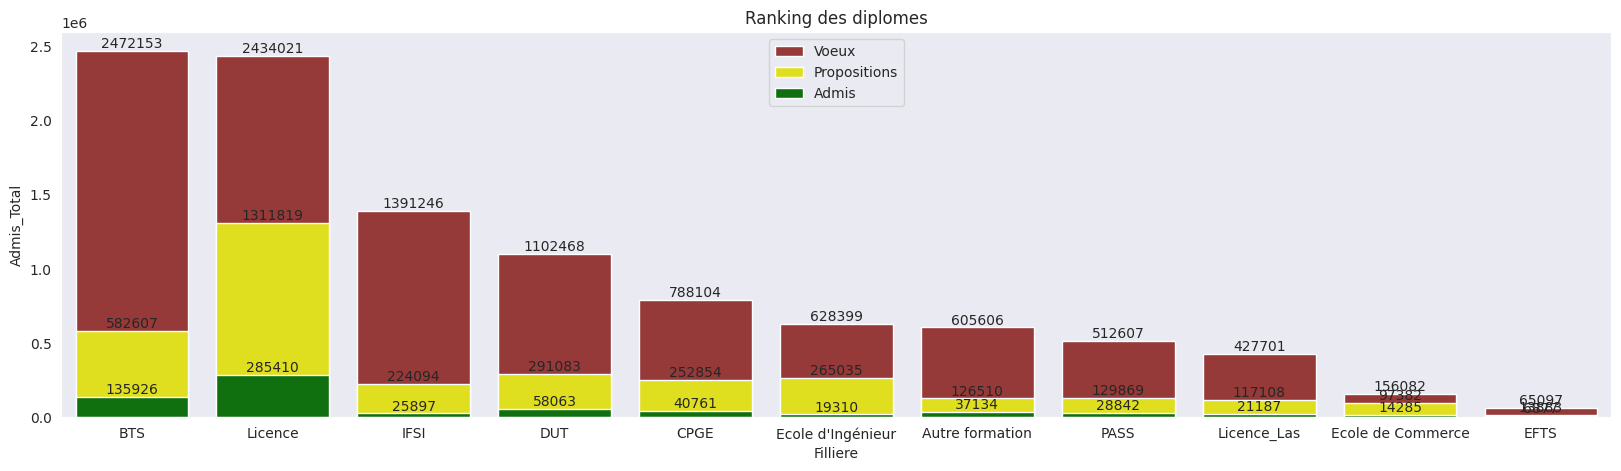

In [34]:
# Agregating data in a new df
diplome = df.groupby('Filliere') \
  .agg({'Filliere' : 'count', 'Voeux_Total': 'sum', 'Proposition_Admission': 'sum', 'Admis_Total': 'sum', 'Capacite' : 'sum'}) \
  .sort_values(by = ('Voeux_Total'), ascending = False)

# Cleaning the new df
diplome.rename(columns = {'Filliere': 'Nombre_Formations'}, inplace = True)
diplome.reset_index(inplace = True)

# Plotting the data
plt.figure(figsize = (20,5))
ax1 = sns.barplot(data = diplome, x= 'Filliere', y = 'Voeux_Total', width = 0.8, label = 'Voeux', color = "brown")
ax2 = sns.barplot(data = diplome, x= 'Filliere', y = 'Proposition_Admission', width = 0.8, label = 'Propositions', color = "yellow")
ax3 = sns.barplot(data = diplome, x= 'Filliere', y = 'Admis_Total', width = 0.8, label = 'Admis', color = "green")
plt.title("Ranking des diplomes")

# Afficher les valeurs au-dessus de chaque barre
for p in ax2.patches:
    ax2.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
    
plt.legend(loc = 9)
plt.show()

Le BTS est le diplôme le plus demandé en nombre de voeux.

La licence est la plus enclin a valider des voeux et accepter des candidats.

In [35]:
# Fonction pour colorier un champs suivant une condition
def coloring(val):
	color = 'brown' if val < 50 else 'green'
	return 'background-color: %s' % color

In [36]:
# Calcul du pourcentage
diplome['Proposition/Voeux_Pct'] = diplome['Proposition_Admission'] / diplome['Voeux_Total'] * 100
diplome['Admis/Voeux_Pct'] = diplome['Admis_Total'] / diplome['Voeux_Total'] * 100

# Trier les champs
diplome = diplome[['Filliere',	'Nombre_Formations',	'Voeux_Total',	'Proposition_Admission', 'Proposition/Voeux_Pct',	'Admis_Total', 'Admis/Voeux_Pct', 'Capacite']]

# Trier par proposition_pct
diplome.sort_values(by = 'Proposition/Voeux_Pct', ascending = False)
diplome.style.applymap(coloring, subset=['Proposition/Voeux_Pct'])

,Filliere,Nombre_Formations,Voeux_Total,Proposition_Admission,Proposition/Voeux_Pct,Admis_Total,Admis/Voeux_Pct,Capacite
0,BTS,5173,2472153,582607,23.566786,135926,5.498284,170023
1,Licence,2578,2434021,1311819,53.895139,285410,11.725864,309686
2,IFSI,329,1391246,224094,16.107432,25897,1.861425,25910
3,DUT,804,1102468,291083,26.402853,58063,5.266638,59338
4,CPGE,847,788104,252854,32.083837,40761,5.172033,46143
5,Ecole d'Ingénieur,402,628399,265035,42.176229,19310,3.072888,21762
6,Autre formation,1577,605606,126510,20.889819,37134,6.131709,44071
7,PASS,227,512607,129869,25.335003,28842,5.626533,28721
8,Licence_Las,457,427701,117108,27.380810,21187,4.953694,22671
9,Ecole de Commerce,144,156082,97382,62.391563,14285,9.152240,16943


**Détails:**
- voeux = nombre de voeux par filliere
- Proposition = voeux acceptés par l'école
- Admis = Proposition acceptée par l'étudiant (un étudiant peut accepter qu'une proposition)

- Proposition/Voeux_Pct = % de proposition sur le nombre de voeux
- Admis/Voeux_Pct = % de propositions acceptées sur le nombre de voeux

**== Insights ==**

9 fillieres sur 11 ont moins de 50% de propositions. Cela peut s'expliquer par le fait que les étudiants font plusieurs voeux

Le taux d'admission est de 6.27% en moyenne

# Analyse des données

Le périmètre de l'analyse porte sur les licence en IDF avec un focus sur les fillières éco

## Création des subsets avec les licences en IDF et licences d'éco en IDF

In [37]:
# Création des conditions de filtrage
cond_lic = df['Filliere'].str.contains("icence")
cond_idf = df['Region_Etablissement'] == 'Ile-de-France'
cond_eco = df['Domaine_Formation'].str.contains("conomi")

# Creation du subset Licences en IDF
licences = df.loc[cond_lic & cond_idf, :]
licences.reset_index(inplace = True)

# Creation du subset Licence d'éco en IDF
licences_eco = df.loc[cond_eco & cond_lic & cond_idf, :]
licences_eco.reset_index(inplace = True)

print('Licences IDF:\n-', licences.shape[0],'Formations\n')
print('Licences éco IDF:\n-', licences_eco.shape[0],'Formations\n\n')

Licences IDF:
- 749 Formations

Licences éco IDF:
- 48 Formations




## Analyse descriptive des Licences et profil candidats

### Overall

Comparaison du nombre de voeux, propositions, admissions et capacité entre les licences_IDF et licences_IDF_Eco

In [38]:
# Récupération des colonnes utiles dans chaque subset
test = licences[['Voeux_Total', 'Proposition_Admission', 'Admis_Total', 'Capacite']].sum().to_frame().T
test_eco = licences_eco[['Voeux_Total', 'Proposition_Admission', 'Admis_Total', 'Capacite']].sum().to_frame().T

# Merge des 2 subsets avec les colonnes utiles
sub_licences = pd.concat([test, test_eco], ignore_index = True)

# Transformaton du dataframe au format long
sub_licences_long = pd.melt(sub_licences)

# Création d'une colonne Licence et imputation suivant le périmètre
sub_licences_long['Licence'] = 'aaaaaaa'
sub_licences_long.iloc[0::2,2] = 'Licence_IDF'
sub_licences_long.iloc[1::2,2] = 'Licence_IDF_Eco'


sub_licences['Licence'] = 'aaaaaaa'
sub_licences.iloc[0,4] = 'Licence_IDF'
sub_licences.iloc[1,4] = 'Licence_IDF_Eco'

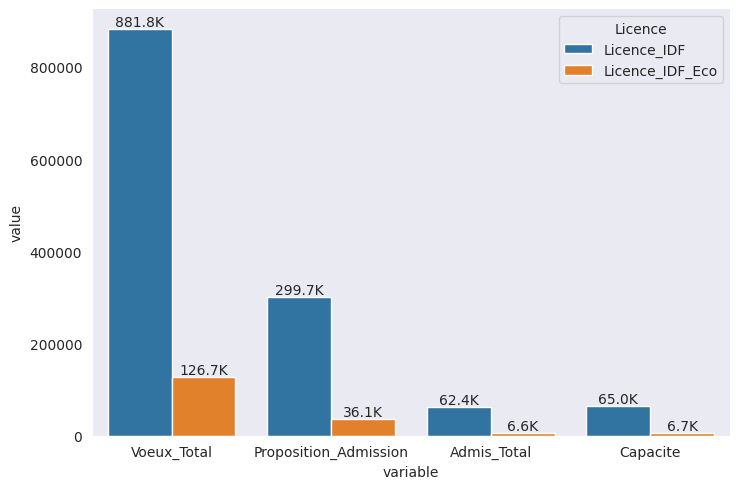

In [39]:
# Visualisation des colonnes pour comparatif visuel entre Licence_idf et Licence_idf_eco
g = sns.catplot(data=sub_licences_long, x="variable", y="value", hue = 'Licence',  kind = 'bar', legend_out = False, aspect= 1.5)
ax = g.facet_axis(0, 0)  # or ax = g.axes.flat[0]

# Etiquettes de données
for c in ax.containers:
    labels = [f'{(v.get_height() / 1000):.1f}K' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')

In [40]:
# Comparatif sous forme de tableau
sub_licences.groupby('Licence').sum()

,Voeux_Total,Proposition_Admission,Admis_Total,Capacite
Licence,,,,
Licence_IDF,881763,299722,62365,65026
Licence_IDF_Eco,126710,36143,6559,6674


Comparatif en nombre de formations

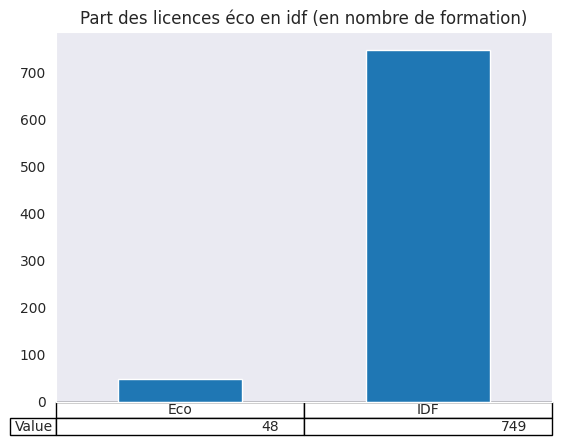

In [41]:
# Comparatif sous forme de tableau
eco_sum = licences_eco.groupby('Filliere')['ID'].count().sum()
idf_sum = licences.groupby('Filliere')['ID'].count().sum()
data = {'Value': [eco_sum , idf_sum],
        'Type' : ['Eco', 'IDF']}

barplot = pd.DataFrame(data)

barplot.plot(x= 'Type', y= 'Value', kind = 'bar', legend = False,  title = 'Part des licences éco en idf (en nombre de formation)', table = True, xlabel = '')
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.show()

**Insights**

- En nombre de candidatures: les formations d'éco representent une minorité des formations en IDF 
- En nombre de formations: Il y a 749 licences en IDF dont 48 en spécialité éco


Détails des formations éco

In [42]:
# Affichage des infos par formations d'éco
licences_eco.groupby('Domaine_Formation').agg({'Domaine_Formation': 'count', 'Voeux_Total': 'sum'})

,Domaine_Formation,Voeux_Total
Domaine_Formation,,
Administration économique et sociale,8,31011
"Droit, Economie",1,1345
Economie,6,15969
Economie et gestion,32,77558
"Economie, Mathématiques",1,827


### Présence de licence éco par départements et académie d'IDF

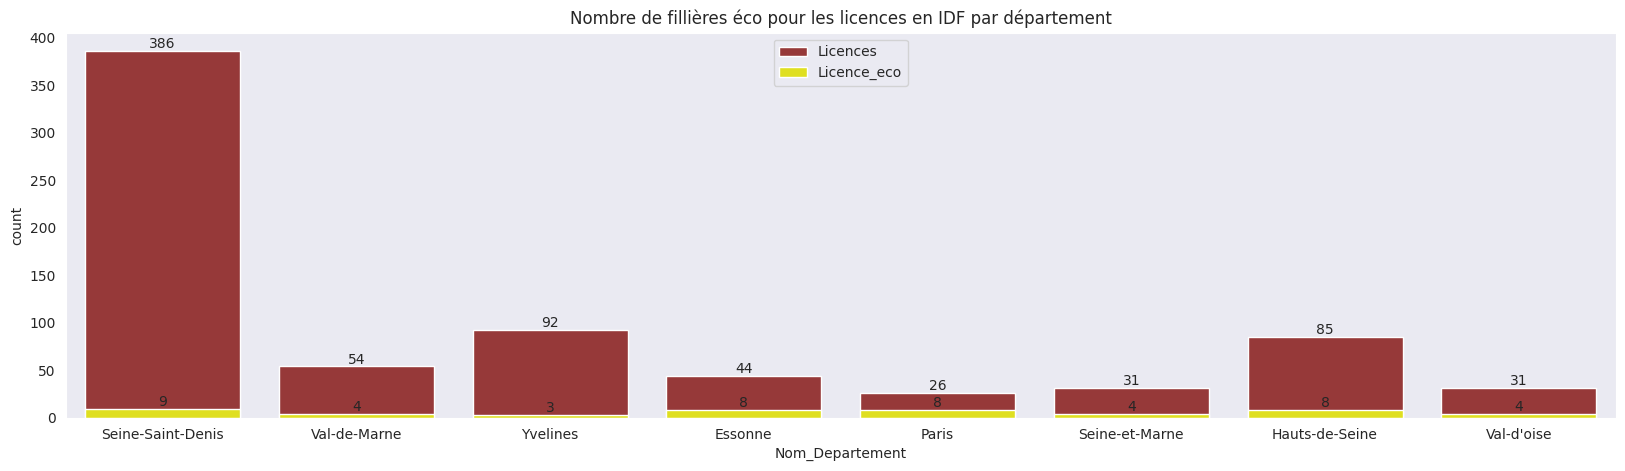

In [43]:
# Plotting the data
plt.figure(figsize = (20,5))

ax1 = sns.countplot(data = licences, x= 'Nom_Departement', width = 0.8, label = 'Licences', color = "brown")
ax2 = sns.countplot(data = licences_eco, x= 'Nom_Departement', width = 0.8, label = 'Licence_eco', color = "yellow")
plt.title("Nombre de fillières éco pour les licences en IDF par département")

# Afficher les valeurs au-dessus de chaque barre
for p in ax2.patches:
    ax2.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')


plt.legend(loc = 9)
plt.show()

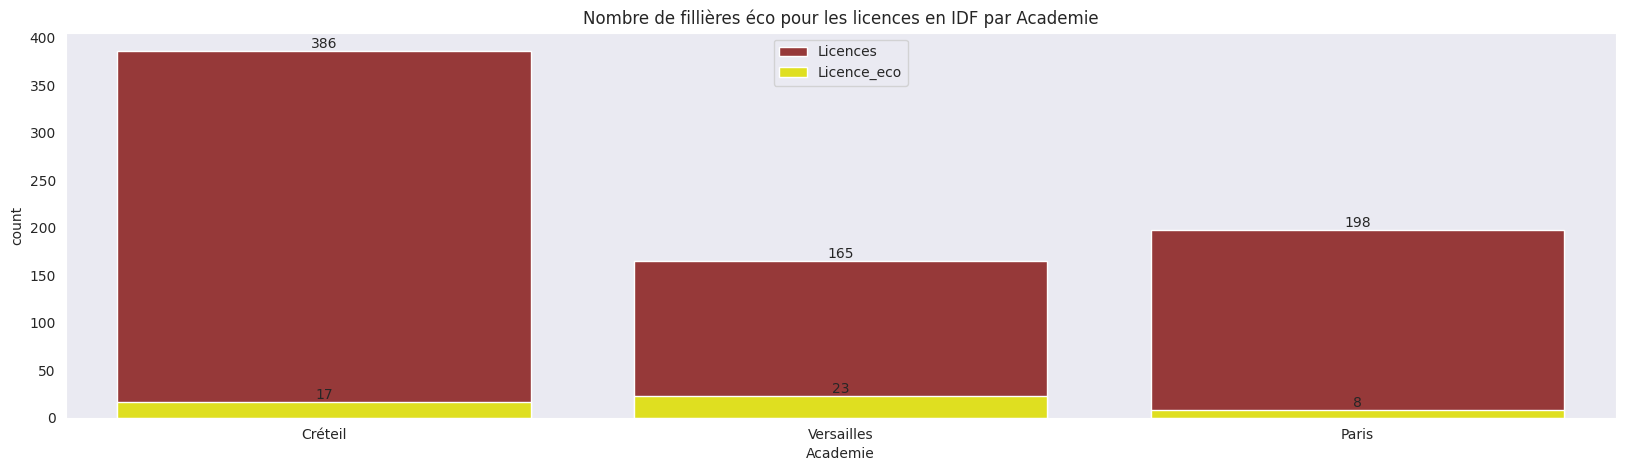

In [44]:
# Plotting the data
plt.figure(figsize = (20,5))

ax1 = sns.countplot(data = licences, x= 'Academie', width = 0.8, label = 'Licences', color = "brown")
ax2 = sns.countplot(data = licences_eco, x= 'Academie', width = 0.8, label = 'Licence_eco', color = "yellow")
plt.title("Nombre de fillières éco pour les licences en IDF par Academie")

# Afficher les valeurs au-dessus de chaque barre
for p in ax2.patches:
    ax2.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')


plt.legend(loc = 9)
plt.show()

### Boursiers

<Figure size 640x480 with 0 Axes>

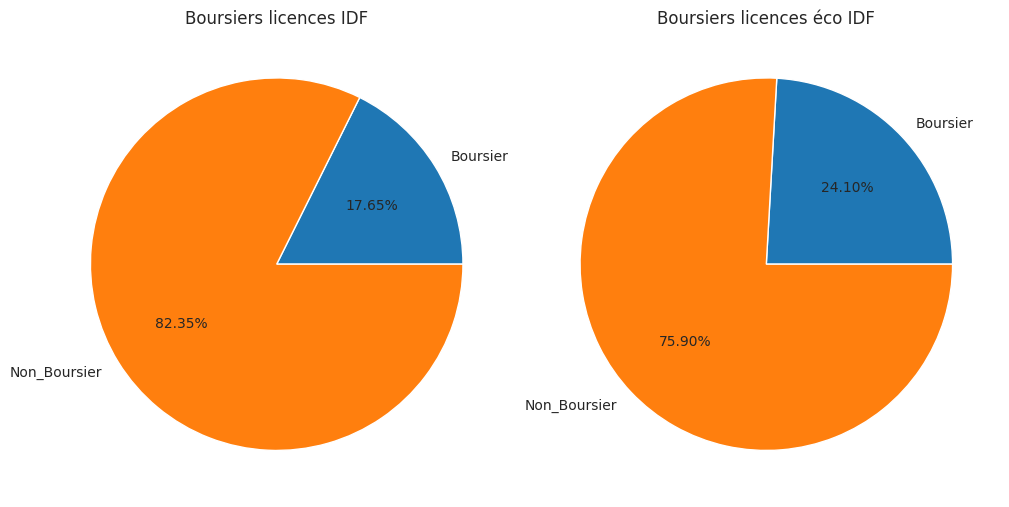

In [45]:
# Création d'un sous DF avec les champs utiles
brs_l_eco = licences_eco.loc[: ,['Admis_Total', 'Admis_Boursier']]
brs_l_eco.rename(columns={'Admis_Total' : 'Total', 'Admis_Boursier' : 'Boursier'}, inplace = True)
brs_l_eco['Non_Boursier'] = brs_l_eco['Total'] - brs_l_eco['Boursier']
brs_l_eco.drop(columns = 'Total', inplace = True)

brs_l = licences.loc[: ,['Admis_Total', 'Admis_Boursier']]
brs_l.rename(columns={'Admis_Total' : 'Total', 'Admis_Boursier' : 'Boursier'}, inplace = True)
brs_l['Non_Boursier'] = brs_l['Total'] - brs_l['Boursier']
brs_l.drop(columns = 'Total', inplace = True)


# Calcul de la somme générale
total_brs_l = brs_l.sum().sum()
total_brs_l_eco = brs_l_eco.sum().sum()

# Pct du total
brs_l_pie = brs_l.sum() / total_brs_l * 100
brs_l_pie_eco = brs_l_eco.sum() / total_brs_l_eco * 100

# Pie charts
plt.figure()
plt.subplots(1,2, figsize = (10,5),layout= 'constrained')

# Creation subplot 1
plt.subplot(1,2,1)
plt.pie(x = brs_l_pie, autopct = '%.2f%%', labels = brs_l.columns)
plt.title('Boursiers licences IDF')

# Creation subplot 2
plt.subplot(1,2,2)
plt.pie(x = brs_l_pie_eco, autopct = '%.2f%%', labels = brs_l_eco.columns)
plt.title('Boursiers licences éco IDF')

# Affichage
plt.show()

### Provenance Bac

<Figure size 640x480 with 0 Axes>

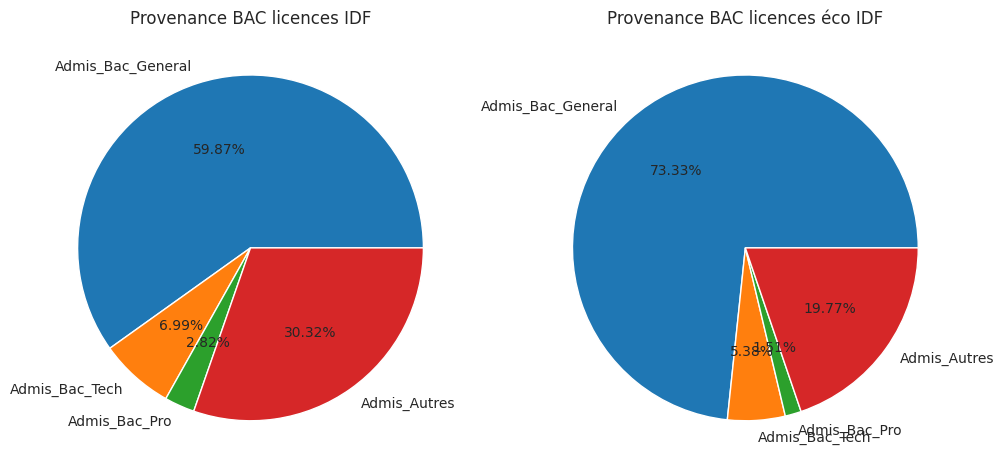

In [46]:
# Création d'un sous DF avec les champs utiles
bac_l = licences.loc[: , ['Admis_Bac_General', 'Admis_Bac_Tech', 'Admis_Bac_Pro', 'Admis_Autres']]
bac_l_eco = licences_eco.loc[: , ['Admis_Bac_General', 'Admis_Bac_Tech', 'Admis_Bac_Pro', 'Admis_Autres']]

# Calcul de la somme générale
total_bac_l = bac_l.sum().sum()
total_bac_l_eco = bac_l_eco.sum().sum()

# Pct du total
bac_l_pie = bac_l.sum() / total_bac_l * 100
bac_l_pie_eco = bac_l_eco.sum() / total_bac_l_eco * 100

# Pie charts
plt.figure()
plt.subplots(1,2, figsize = (10,5),layout= 'constrained')

# Creation subplot1
plt.subplot(1,2,1)
plt.pie(x = bac_l_pie, autopct = '%.2f%%', labels = bac_l.columns)
plt.title('Provenance BAC licences IDF')

# Creation subplot 2
plt.subplot(1,2,2)
plt.pie(x = bac_l_pie_eco, autopct = '%.2f%%', labels = bac_l_eco.columns)
plt.title('Provenance BAC licences éco IDF')

# Affichage
plt.show()


### Parité

<Figure size 640x480 with 0 Axes>

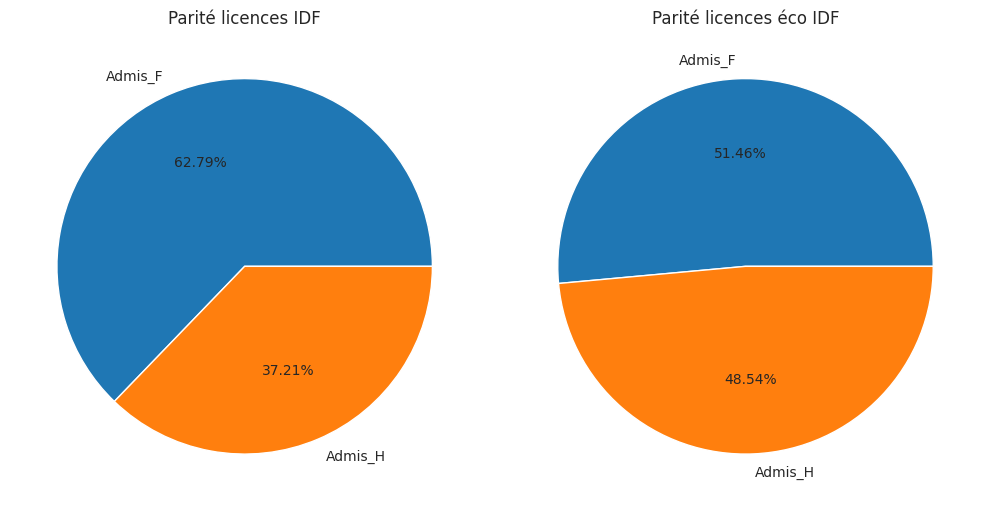

In [47]:
# Création d'un sous DF avec les champs utiles
par_l = licences.loc[: ,['Admis_Total', 'Admis_F']]
par_l.rename(columns={'Admis_Total' : 'Total', 'Admis_F' : 'Admis_F'}, inplace = True)
par_l['Admis_H'] = par_l['Total'] - par_l['Admis_F']
par_l.drop(columns = 'Total', inplace = True)

par_l_eco = licences_eco.loc[: ,['Admis_Total', 'Admis_F']]
par_l_eco.rename(columns={'Admis_Total' : 'Total', 'Admis_F' : 'Admis_F'}, inplace = True)
par_l_eco['Admis_H'] = par_l_eco['Total'] - par_l_eco['Admis_F']
par_l_eco.drop(columns = 'Total', inplace = True)

# Calcul de la somme générale
total_par_l = par_l.sum().sum()
total_par_l_eco = par_l_eco.sum().sum()

# Pct du total
par_l_pie = par_l.sum() / total_par_l * 100
par_l_pie_eco = par_l_eco.sum() / total_par_l_eco * 100

# Pie charts
plt.figure()
plt.subplots(1,2, figsize = (10,5),layout= 'constrained')

# Creation subplot 1
plt.subplot(1,2,1)
plt.pie(x = par_l_pie, autopct = '%.2f%%', labels = par_l.columns)
plt.title('Parité licences IDF')

# Creation subplot 2
plt.subplot(1,2,2)
plt.pie(x = par_l_pie_eco, autopct = '%.2f%%', labels = par_l_eco.columns)
plt.title('Parité licences éco IDF')

# Affichage
plt.show()

**Insights**

Il y a plus de femmes que d'hommes admis

### Mentions

<Figure size 640x480 with 0 Axes>

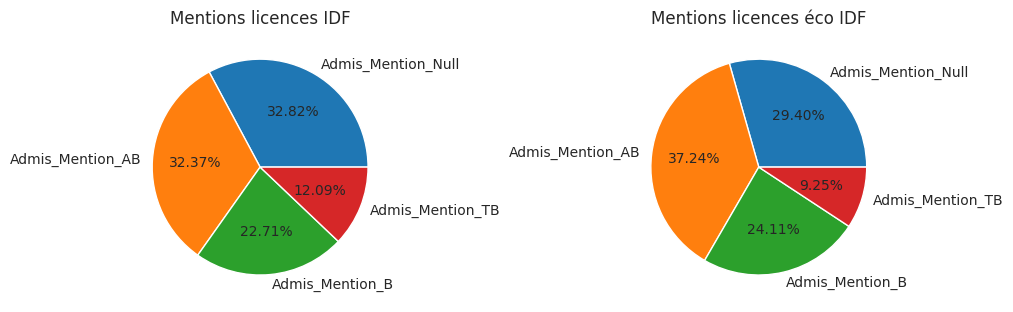

In [48]:
# Création d'un sous DF avec les champs utiles
mention_l = licences.loc[: , ['Admis_Mention_Null', 'Admis_Mention_AB','Admis_Mention_B','Admis_Mention_TB']]
mention_l_eco = licences_eco.loc[: , ['Admis_Mention_Null', 'Admis_Mention_AB','Admis_Mention_B','Admis_Mention_TB']]

# Calcul de la somme générale
total_mention_l = mention_l.sum().sum()
total_mention_l_eco = mention_l_eco.sum().sum()

# Pct du total
mention_l_pie = mention_l.sum() / total_mention_l * 100
mention_l_pie_eco = mention_l_eco.sum() / total_mention_l_eco * 100

# Pie charts
plt.figure()
plt.subplots(1,2, figsize = (10,5),layout= 'constrained')

# Creation subplot 1
plt.subplot(1,2,1)
plt.pie(x = mention_l_pie, autopct = '%.2f%%', labels = mention_l.columns)
plt.title('Mentions licences IDF')

## Creation subplot 2
plt.subplot(1,2,2)
plt.pie(x = mention_l_pie_eco, autopct = '%.2f%%', labels = mention_l_eco.columns)
plt.title('Mentions licences éco IDF')

# Affichage
plt.show()

**Insights**

Les mentions au bac sont plûtot équilibrée

### Changement d'academie

<Figure size 640x480 with 0 Axes>

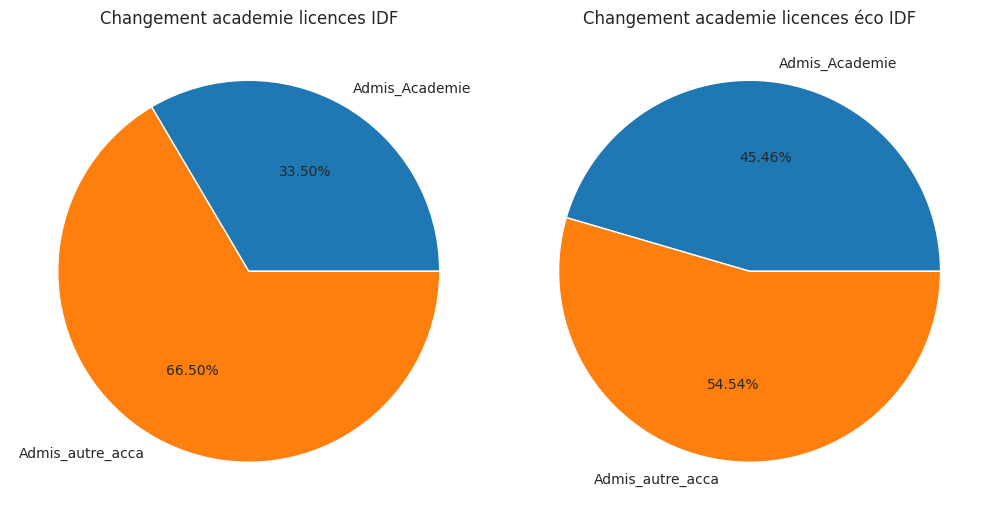

In [49]:
# Création d'un sous DF avec les champs utiles
aca_l = licences.loc[: ,['Admis_Total', 'Admis_Academie']]
aca_l.rename(columns={'Admis_Total' : 'Total'}, inplace = True)
aca_l['Admis_autre_acca'] = aca_l['Total'] - aca_l['Admis_Academie']
aca_l.drop(columns = 'Total', inplace = True)

aca_l_eco = licences_eco.loc[: ,['Admis_Total', 'Admis_Academie']]
aca_l_eco.rename(columns={'Admis_Total' : 'Total'}, inplace = True)
aca_l_eco['Admis_autre_acca'] = aca_l_eco['Total'] - aca_l_eco['Admis_Academie']
aca_l_eco.drop(columns = 'Total', inplace = True)

# Calcul de la somme générale
total_aca_l = aca_l.sum().sum()
total_aca_l_eco = aca_l_eco.sum().sum()

# Pct du total
aca_l_pie = aca_l.sum() / total_aca_l * 100
aca_l_pie_eco = aca_l_eco.sum() / total_aca_l_eco * 100

# Pie charts
plt.figure()
plt.subplots(1,2, figsize = (10,5),layout= 'constrained')

# Creation subplot 1
plt.subplot(1,2,1)
plt.pie(x = aca_l_pie, autopct = '%.2f%%', labels = aca_l.columns)
plt.title('Changement academie licences IDF')

# Creation subplot 2
plt.subplot(1,2,2)
plt.pie(x = aca_l_pie_eco, autopct = '%.2f%%', labels = aca_l_eco.columns)
plt.title('Changement academie licences éco IDF')

# Affichage
plt.show()

## Occupation des Licences

### Occupation des Licences en IDF

Exploration du taux d'occupation des formations:
- En nombre d'élèves
- En pourcentage par rapport à la capacité

In [50]:
# Creation d'un subset avec les champs utiles
remplissage = licences.loc[:, ['Nom_Etablissement', 'Nom_Departement', 'Admis_Total', 'Capacite', 'Taux_Acces']]

# Calcul du delta entre admis et capacité ainsi que le pourcentage
remplissage['Delta'] = licences['Admis_Total'] - licences['Capacite'] # Nombre de places libres
remplissage['Delta_Pct'] = round(remplissage['Delta'] / remplissage['Capacite'] * 100, 0) # Pourcentage par rapport à la capacité

remplissage.head()

,Nom_Etablissement,Nom_Departement,Admis_Total,Capacite,Taux_Acces,Delta,Delta_Pct
0,Université de Paris,Paris,14,15,76.0,-1,-7.0
1,Université Sorbonne Nouvelle Paris 3,Paris,64,63,64.0,1,2.0
2,Université Sorbonne Nouvelle Paris 3,Paris,79,80,49.0,-1,-1.0
3,Université Sorbonne Nouvelle Paris 3,Paris,34,32,60.0,2,6.0
4,Université Sorbonne Nouvelle Paris 3,Paris,74,75,69.0,-1,-1.0


Détail des niveaux d'occupations

In [51]:
print("Formations totale: ", remplissage.shape[0])
print("Formations en sur effectifs: ", remplissage.query('Delta > 0').shape[0], "soit ", round((remplissage.query('Delta > 0').shape[0] / remplissage.shape[0]) * 100), "% des formations")
print("Formations en sous effectifs: ", remplissage.query('Delta < 0').shape[0], "soit ", round((remplissage.query('Delta < 0').shape[0] / remplissage.shape[0]) * 100), "% des formations")
print("Formations en effectifs optimal: ", remplissage.query('Delta == 0').shape[0], "soit ", round((remplissage.query('Delta == 0').shape[0] / remplissage.shape[0]) * 100), "% des formations")

Formations totale:  749
Formations en sur effectifs:  90 soit  12 % des formations
Formations en sous effectifs:  509 soit  68 % des formations
Formations en effectifs optimal:  150 soit  20 % des formations


Evaluation des degrés d'occupations

<ipython-input-52-ddafea774f50>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45)


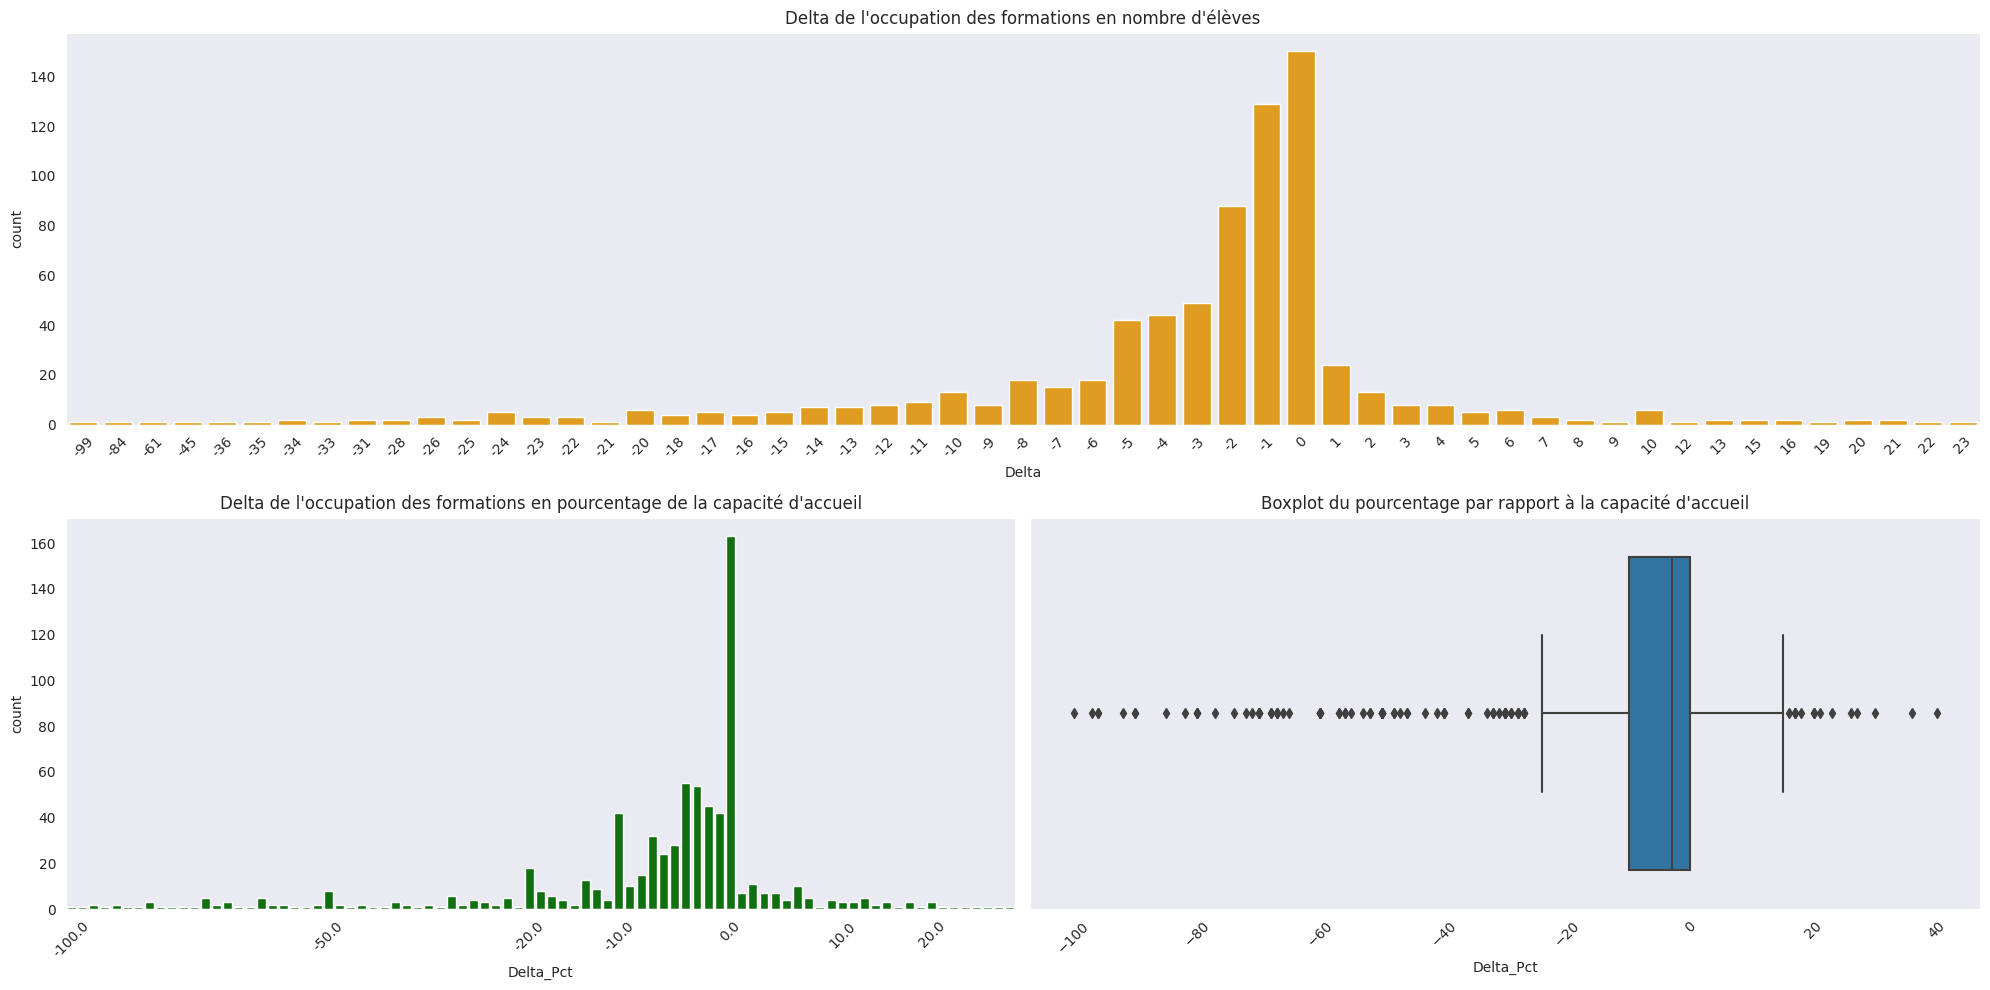

In [52]:
# Visualisation de la distribution des deltas en nombre d'élèves et pourcentage par rapport à la capacité d'acceuil
fig = plt.figure(figsize = (20,10))

# Creation d'une grille 2 par 2
gs = fig.add_gridspec(2, 2)

# Creation des subplot
ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])

# Visualisation en capacité d'élèves
sns.countplot(ax=ax1, data=remplissage, x='Delta', color = 'orange')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
ax1.set_title("Delta de l'occupation des formations en nombre d'élèves")

# Countplot du pourcentage par rapport à la capacité d'accueil
sns.countplot(ax=ax2, data=remplissage, x='Delta_Pct', color = 'green')
ax2.set_xticks([0,23,41,49,59,69,77])
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)
ax2.set_title("Delta de l'occupation des formations en pourcentage de la capacité d'accueil")

# Boxplot du pourcentage par rapport à la capacité d'accueil
sns.boxplot(ax=ax3, data=remplissage, x='Delta_Pct')
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45)
ax3.set_title("Boxplot du pourcentage par rapport à la capacité d'accueil")

plt.tight_layout()
plt.show()

🔎 Le taux d'occupation est autour de 0 donc les formations sont a priori remplies équitablement.

Groupage des pourcentages par seuils:
- Pas de candidats : -100%
- Sous_eff_important : -99% à -20%
- Sous_eff_moderé: -20% à -1%
- Optimal: 0%
- Sur_eff_moderé: 1% à 20%
- Sur_eff_important: 21% à 99%
- Effectif_double: + 100%

In [53]:
# Fonction qui permet de grouper les résultats par tranche
def deg_rempl(row):
  if (row['Delta_Pct'] >= -99) & (row['Delta_Pct'] < -20):
    val = 'Sous_eff_important [-99%; -20%]'
  elif (row['Delta_Pct'] >= -20) & (row['Delta_Pct'] < 0):
    val = 'Sous_eff_moderé [-20%; -1%]'
  elif row['Delta_Pct'] == 0:
    val = 'Optimal [0%]'
  elif (row['Delta_Pct'] > 0) & (row['Delta_Pct'] <= 20):
    val = 'Sur_eff_moderé [1%; 20%]'
  elif (row['Delta_Pct'] > 20) & (row['Delta_Pct'] <= 99):
    val = 'Sur_eff_important [21%; 99%]'
  elif row['Delta_Pct'] == -100:
    val = 'Pas de candidats'
  else:
    val = 'Effectif_double [100% +]'
  return val

In [79]:
# Détail par tranche
print("Détail par tranche d'occupation (en nombre de formations)\n=======================================")
remplissage['Tranche_Pct'] = remplissage.apply(deg_rempl, axis=1)
remplissage['Tranche_Pct'].value_counts()

Détail par tranche d'occupation (en nombre de formations)


Sous_eff_moderé [-20%; -1%]        5844
Optimal [0%]                       2534
Sous_eff_important [-99%; -20%]    2493
Sur_eff_moderé [1%; 20%]           1676
Sur_eff_important [21%; 99%]        143
Pas de candidats                     64
Effectif_double [100% +]              5
Name: Tranche_Pct, dtype: int64

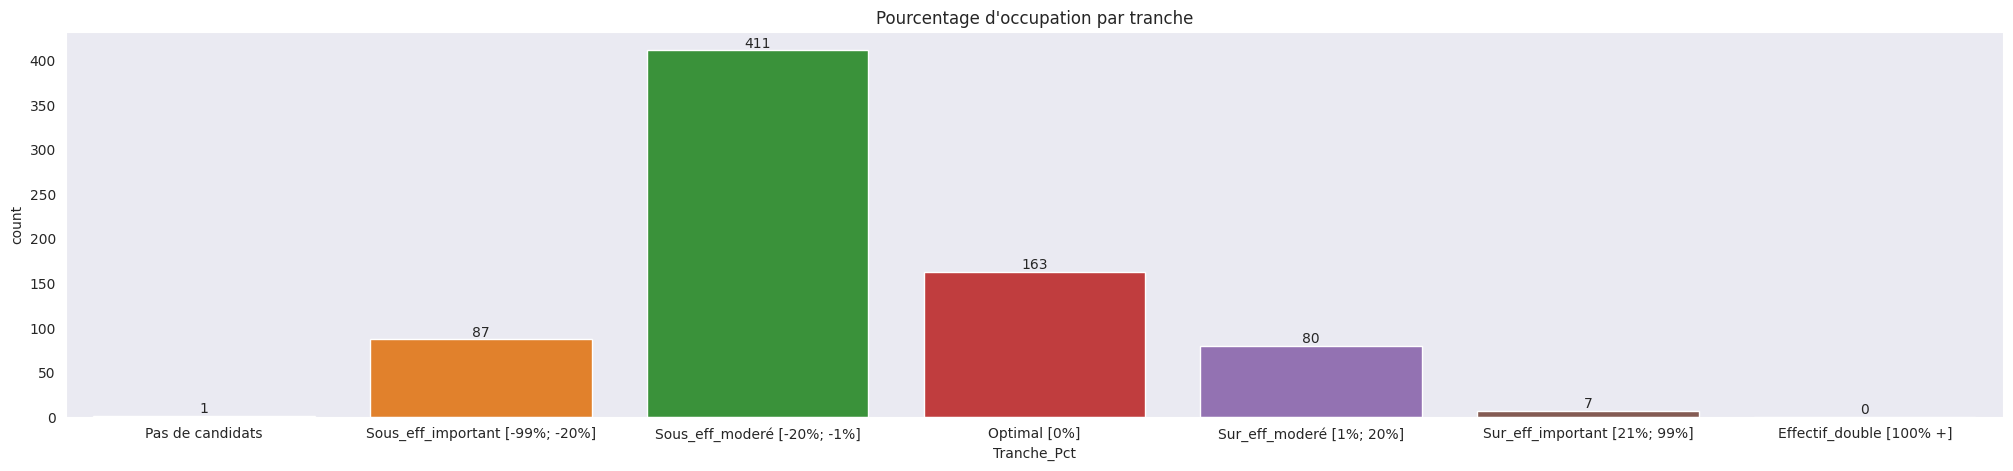

In [55]:
# Visulisation par tranche
plt.figure(figsize=(25, 5))
order = ['Pas de candidats', 'Sous_eff_important [-99%; -20%]', 'Sous_eff_moderé [-20%; -1%]', 'Optimal [0%]', 'Sur_eff_moderé [1%; 20%]', 'Sur_eff_important [21%; 99%]', 'Effectif_double [100% +]']
ax = sns.countplot(data=remplissage, x='Tranche_Pct', order = order)


# Afficher les valeurs au-dessus de chaque barre
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

plt.title("Pourcentage d'occupation par tranche")
plt.show()

**Insights**

Formations en sous effectifs:

- Malgré le fait que 68% des formations soient concernées, la majorité le sont en entre -1% et -20% de leur capacité d'acceuil.


Formations en sur effectifs:
- 80 Formations sont en sur effectifs modéré
- 7 Formation sont en sur effectif important

### Occupation des Licences d'éco en IDF

Exploration du taux d'occupation des formations:
- En nombre d'élèves
- En pourcentage par rapport à la capacité

In [56]:
# Creation d'un subset avec les champs utiles
remplissage_eco = licences_eco.loc[:, ['Nom_Etablissement', 'Nom_Departement', 'Voeux_Total', 'Proposition_Admission', 'Admis_Total', 'Capacite', 'Taux_Acces']]

# Calcul des deltas et pourcentage entre admis, propositions et capacités
remplissage_eco['Delta_Admis'] = licences_eco['Admis_Total'] - licences_eco['Capacite'] # Nombre de places libres
remplissage_eco['Delta_Admis_Pct'] = round(remplissage_eco['Delta_Admis'] / remplissage_eco['Capacite'] * 100, 0) # Pourcentage par rapport à la capacité

remplissage_eco['Delta_Prop'] = licences_eco['Proposition_Admission'] - licences_eco['Capacite'] # Surplus de propositions
remplissage_eco['Delta_Prop_Pct'] = round(remplissage_eco['Delta_Prop'] / remplissage_eco['Capacite'] * 100, 0) # Pourcentage par rapport à la capacité

remplissage_eco.head()

,Nom_Etablissement,Nom_Departement,Voeux_Total,Proposition_Admission,Admis_Total,Capacite,Taux_Acces,Delta_Admis,Delta_Admis_Pct,Delta_Prop,Delta_Prop_Pct
0,Université Paris 13,Seine-Saint-Denis,927,318,57,60,43.0,-3,-5.0,258,430.0
1,Université Paris 8,Seine-Saint-Denis,1069,117,15,15,21.0,0,0.0,102,680.0
2,Université Paris- Est-Créteil Val de Marne - U...,Val-de-Marne,702,200,29,30,33.0,-1,-3.0,170,567.0
3,Université de Versailles - Saint Quentin en Yv...,Yvelines,1494,721,113,123,69.0,-10,-8.0,598,486.0
4,"Université Paris-Saclay, Campus d'Orsay",Essonne,827,250,25,30,59.0,-5,-17.0,220,733.0


Détail des niveaux d'occupations

In [57]:
print("Formations totale: ", remplissage_eco.shape[0])
print("Formations en sur effectifs: ", remplissage_eco.query('Delta_Admis > 0').shape[0], "soit ", round((remplissage_eco.query('Delta_Admis > 0').shape[0] / remplissage_eco.shape[0]) * 100), "% des formations")
print("Formations en sous effectifs: ", remplissage_eco.query('Delta_Admis < 0').shape[0], "soit ", round((remplissage_eco.query('Delta_Admis < 0').shape[0] / remplissage_eco.shape[0]) * 100), "% des formations")
print("Formations en effectifs optimal: ", remplissage_eco.query('Delta_Admis == 0').shape[0], "soit ", round((remplissage_eco.query('Delta_Admis == 0').shape[0] / remplissage_eco.shape[0]) * 100), "% des formations")

Formations totale:  48
Formations en sur effectifs:  9 soit  19 % des formations
Formations en sous effectifs:  28 soit  58 % des formations
Formations en effectifs optimal:  11 soit  23 % des formations


Evaluation du degrés d'occupation

<ipython-input-58-345c9d85e17f>:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45)


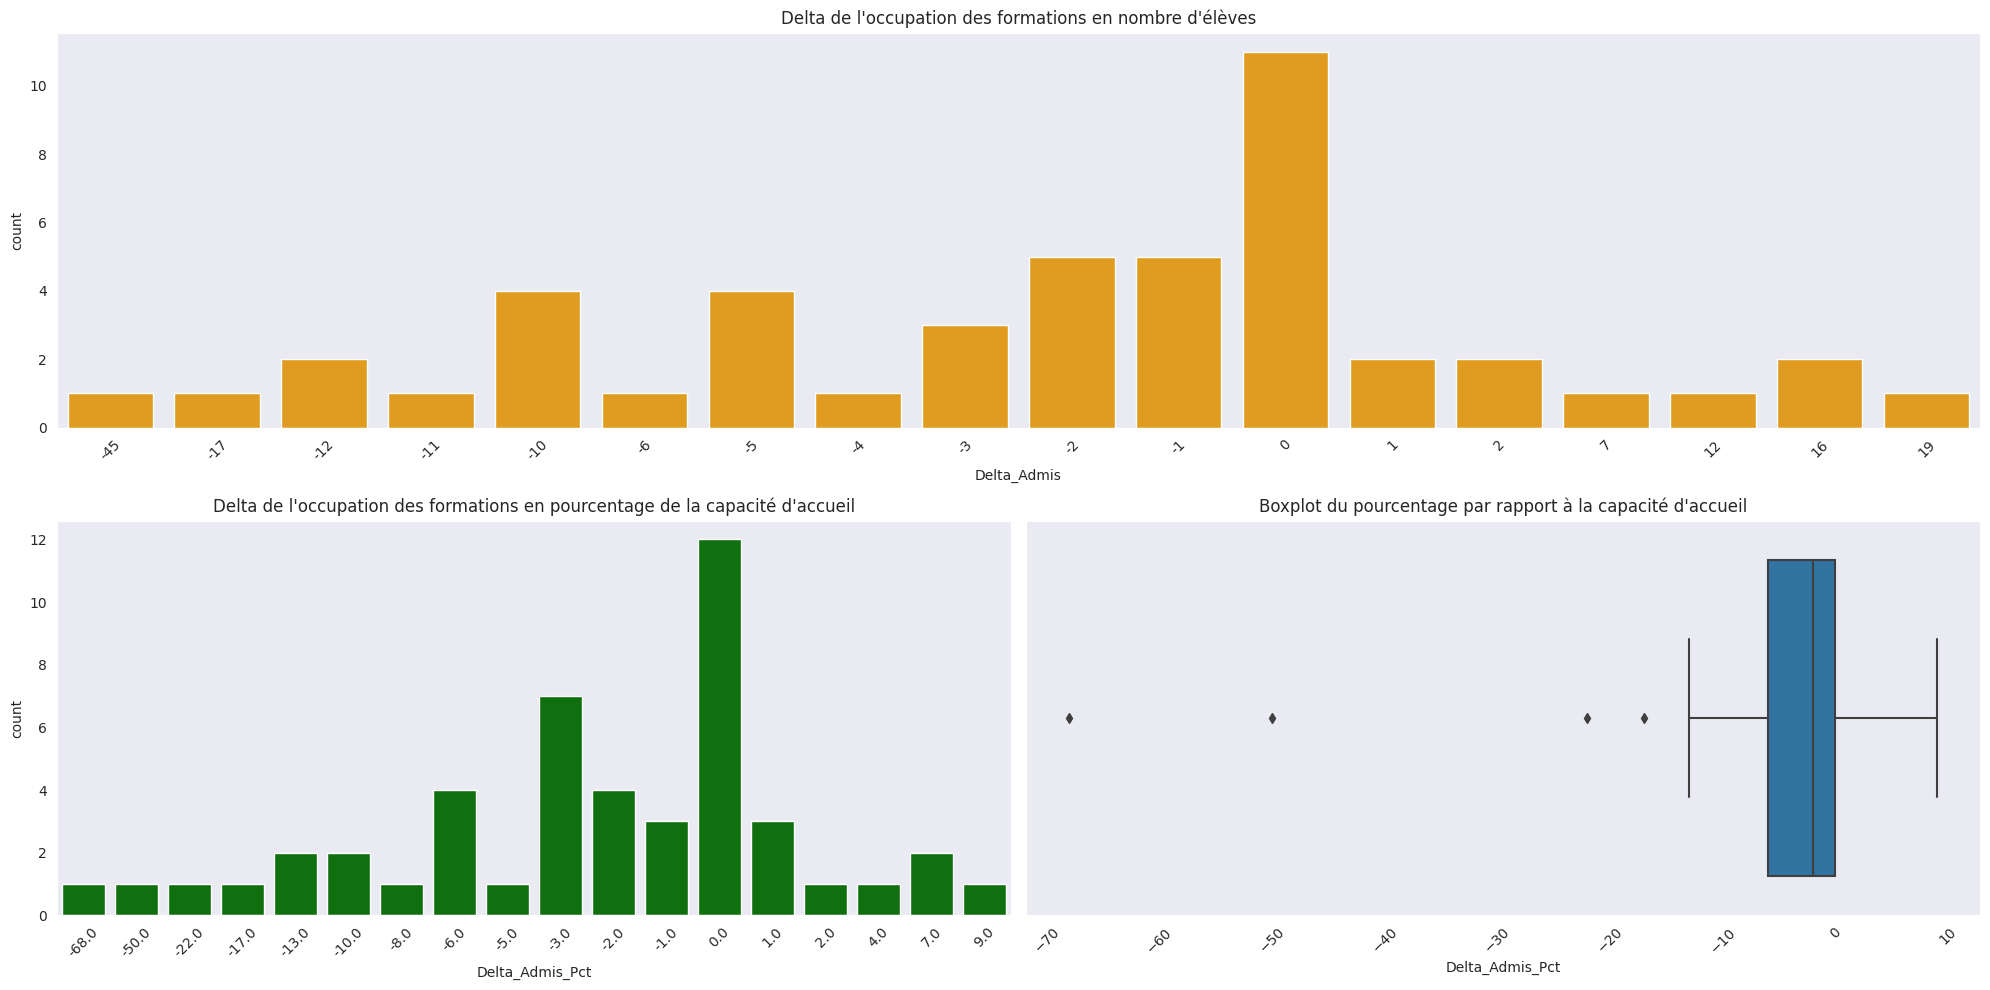

In [58]:
# Visualisation de la distribution des deltas en nombre d'élèves et pourcentage par rapport à la capacité d'acceuil
fig = plt.figure(figsize = (20,10))

# Creation d'une grille 2 par 2
gs = fig.add_gridspec(2, 2)

# Creation des subplot
ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])

# Visualisation en capacité d'élèves
sns.countplot(ax=ax1, data=remplissage_eco, x='Delta_Admis', color = 'orange')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
ax1.set_title("Delta de l'occupation des formations en nombre d'élèves")

# Countplot du pourcentage par rapport à la capacité d'accueil
sns.countplot(ax=ax2, data=remplissage_eco, x='Delta_Admis_Pct', color = 'green')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)
ax2.set_title("Delta de l'occupation des formations en pourcentage de la capacité d'accueil")

# Boxplot du pourcentage par rapport à la capacité d'accueil
sns.boxplot(ax=ax3, data=remplissage_eco, x='Delta_Admis_Pct')
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45)
ax3.set_title("Boxplot du pourcentage par rapport à la capacité d'accueil")

plt.tight_layout()
plt.show()

🔎 Le taux d'occupation est autour de 0 donc les formations sont a priori remplies équitablement.

Groupage des pourcentages par seuils:
- Pas de candidats : -100%
- Sous_eff_important : -99% à -20%
- Sous_eff_moderé: -20% à -1%
- Optimal: 0%
- Sur_eff_moderé: 1% à 20%
- Sur_eff_important: 21% à 99%
- Effectif_double: + 100%

In [59]:
# Fonction qui permet de grouper les résultats par tranche
def deg_rempl_eco(row):
  if (row['Delta_Admis_Pct'] >= -99) & (row['Delta_Admis_Pct'] < -20):
    val = 'Sous_eff_important [-99%; -20%]'
  elif (row['Delta_Admis_Pct'] >= -20) & (row['Delta_Admis_Pct'] < 0):
    val = 'Sous_eff_moderé [-20%; -1%]'
  elif row['Delta_Admis_Pct'] == 0:
    val = 'Optimal [0%]'
  elif (row['Delta_Admis_Pct'] > 0) & (row['Delta_Admis_Pct'] <= 20):
    val = 'Sur_eff_moderé [1%; 20%]'
  elif (row['Delta_Admis_Pct'] > 20) & (row['Delta_Admis_Pct'] <= 99):
    val = 'Sur_eff_important [21%; 99%]'
  elif row['Delta_Admis_Pct'] == -100:
    val = 'Pas de candidats'
  else:
    val = 'Effectif_double [100% +]'
  return val

In [80]:
# Détail par tranche
print("Détail par tranche d'occupation (en nombre de formations)\n=====================================")
remplissage_eco['Tranche_Pct'] = remplissage_eco.apply(deg_rempl_eco, axis=1)
remplissage_eco['Tranche_Pct'].value_counts()

Détail par tranche d'occupation (en nombre de formations)


Sous_eff_moderé [-20%; -1%]        25
Optimal [0%]                       12
Sur_eff_moderé [1%; 20%]            8
Sous_eff_important [-99%; -20%]     3
Name: Tranche_Pct, dtype: int64

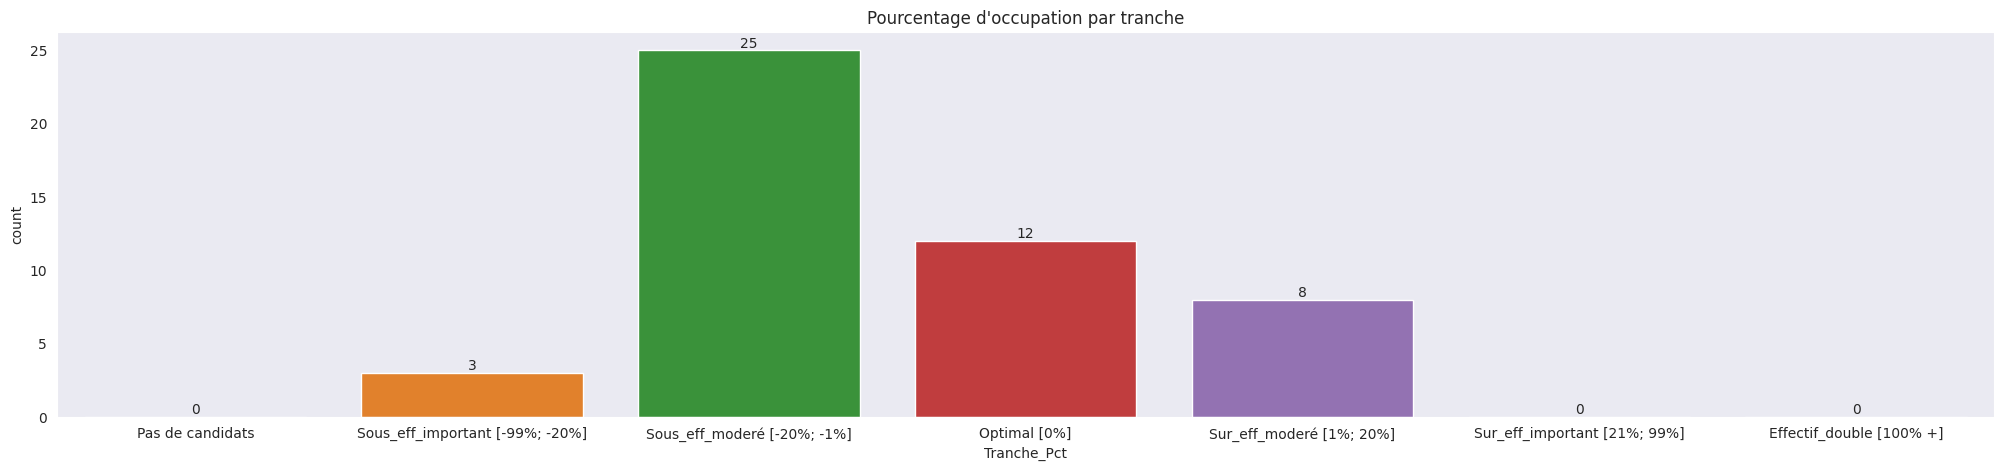

In [61]:
# Visualisation par tranche
plt.figure(figsize=(25, 5))
order = ['Pas de candidats', 'Sous_eff_important [-99%; -20%]', 'Sous_eff_moderé [-20%; -1%]', 'Optimal [0%]', 'Sur_eff_moderé [1%; 20%]', 'Sur_eff_important [21%; 99%]', 'Effectif_double [100% +]']
ax = sns.countplot(data=remplissage_eco, x='Tranche_Pct', order = order)


# Afficher les valeurs au-dessus de chaque barre
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

plt.title("Pourcentage d'occupation par tranche")
plt.show()

**Insights**

Formations en sous effectifs:

- Malgré le fait que 58% des formations soient concernées, la majorité le sont en entre -1% et -20% de leur capacité d'acceuil.

- 25 Formations sont en sous effectifs modéré
- 8 Formation sont en sur effectif modéré

## Selectivité des licences

La selectivité des formations se mesure avec le taux d'accès. Un Taux d'Accès à 100% signifie que tous les candidats qui voulaient accéder à cette formation, ont reçu une proposition d'admission en phase principale. 

Plus le pourcentage est faible plus la formation est selective


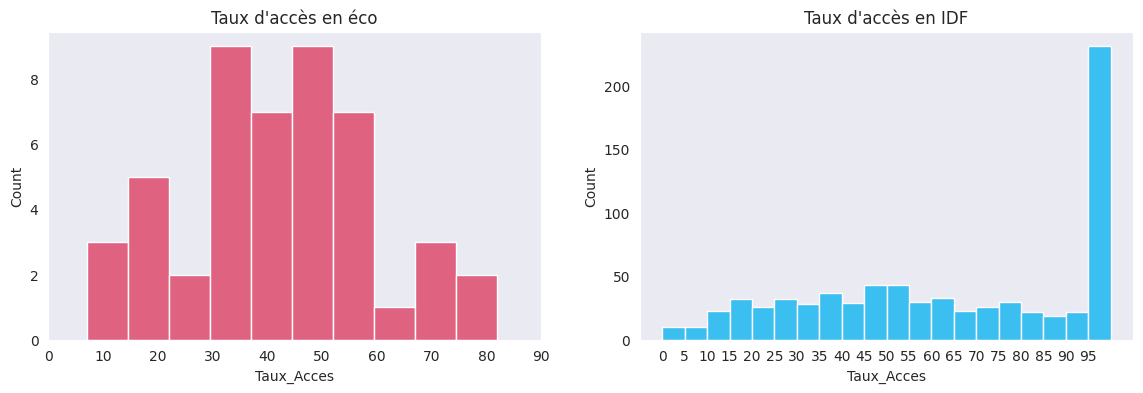

In [62]:
# Visualisation des distributions des taux d'accès
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

# Visualisation de la distribution des taux d'accès en éco
sns.histplot(data = licences_eco, x="Taux_Acces", bins = 10, color='#DC365B', ax=axes[0])
axes[0].set_title("Taux d'accès en éco")
axes[0].xaxis.set_ticks(np.arange(0, 100, 10))

# Visualisation de la distribution des taux d'accès en IDF
sns.histplot(data = licences, x="Taux_Acces", bins = 20, color='#00B0F0', ax=axes[1])
axes[1].set_title("Taux d'accès en IDF")
axes[1].xaxis.set_ticks(np.arange(0, 100, 5))

plt.show()

**Insights**

Licences eco:
- La majorité des formations on un TA autours de 50%
- 8 formations ont un TA < 30% donc selectives

Licences IDF:
- La selectivité est plutot constante
- Il a plus de 200 formations avec un TA > 95% soit **26%** du total des formations

In [63]:
# Focus sur les licences IDF avec un TA > 95
licences.loc[licences['Taux_Acces'] > 95].groupby(by = 'Domaine_Formation')['Domaine_Formation'].count().sort_values(ascending=False)

Domaine_Formation
Langues, littératures & civilisations étrangères et régionales    118
Lettres                                                            26
Histoire                                                           21
Langues étrangères appliquées                                      19
Géographie et aménagement                                           9
                                                                 ... 
Lettres, langues                                                    1
Lettres / Sciences du langage                                       1
Etudes théâtrales                                                   1
Histoire / Allemand                                                 1
Théologie                                                           1
Name: Domaine_Formation, Length: 18, dtype: int64

Les formations en littératures / lettres sont les moins selectives

## Correlations

- Est-ce que la selectivité est une cause des formations en sous effectifs ?
- Est-ce que le nombre de proposition est lié à la selectivité ? 
- Est-ce que les candidats acceptent les props des établissement selectifs ?

In [64]:
# Creation d'un subset avec les champs utiles
corr_eco = licences_eco.loc[:, ['Nom_Etablissement', 'Nom_Departement', 'Voeux_Total', 'Proposition_Admission', 'Admis_Total', 'Capacite', 'Taux_Acces']]

# Calcul des deltas et pourcentage entre admis, propositions et capacités
corr_eco['Delta_Admis'] = corr_eco['Admis_Total'] - corr_eco['Capacite'] # Nombre de places libres
corr_eco['Prop_Pct'] = round(corr_eco['Proposition_Admission'] / corr_eco['Voeux_Total'] * 100) # Pourcentage des propositions validées
corr_eco['Admis_Prop_Pct'] = round(corr_eco['Admis_Total'] / corr_eco['Proposition_Admission'] * 100) # Pourcentage d'admis sur le nombre de propositions

<Figure size 2500x500 with 0 Axes>

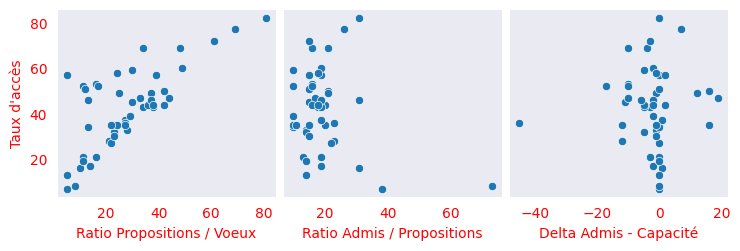

In [81]:
# Création du plot
plt.figure(figsize = (25,5))
ax = sns.pairplot(data = corr_eco, y_vars= 'Taux_Acces', x_vars = ['Prop_Pct', 'Admis_Prop_Pct', 'Delta_Admis'])
ax.tick_params(axis='both', colors='red')

# Changer la couleur du nom de l'axe y
ax.axes[0, 0].set_ylabel('Taux d\'accès', color='red')

# Changer la couleur des noms des axes x
ax.axes[0, 0].set_xlabel('Ratio Propositions / Voeux', color='red')
ax.axes[0, 1].set_xlabel('Ratio Admis / Propositions', color='red')
ax.axes[0, 2].set_xlabel('Delta Admis - Capacité', color='red')

#plt.savefig("pairplot.png", transparent = True, dpi = 500)
plt.show()

**Insights**

Il y a moins de propositions pour les TA faibles

Les candidats ne sont pas plus enclins à accepter la proposition pour un TA faible

La selectivité des formations n'est pas la cause des sous effectifs


<Axes: >

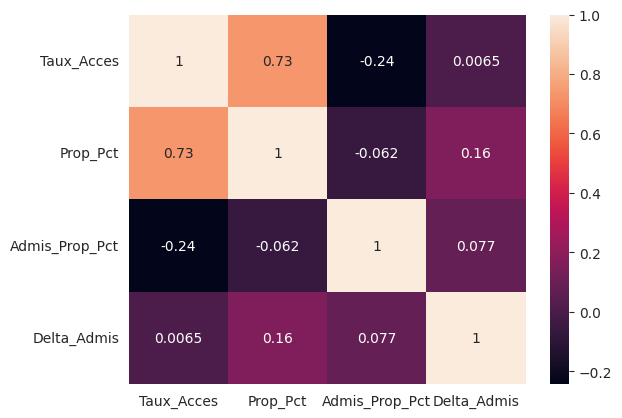

In [66]:
# heatmap correlation
sns.heatmap(data = corr_eco[['Taux_Acces','Prop_Pct', 'Admis_Prop_Pct', 'Delta_Admis']].corr(), annot = True)

# Corbeille

## Remplissage des formations (Total)

In [67]:
remplissage = df.loc[:, ['Nom_Etablissement', 'Nom_Departement', 'Admis_Total', 'Capacite']]
remplissage['Delta'] = df['Admis_Total'] - df['Capacite']
remplissage['Delta_Pct'] = round(remplissage['Delta'] / remplissage['Capacite'] * 100, 0)

remplissage

,Nom_Etablissement,Nom_Departement,Admis_Total,Capacite,Delta,Delta_Pct
0,IFSI - Croix-Rouge Française - Angoulême,Charente,124,120,4,3.0
1,IFSI CH Saintonge,Charente-Maritime,56,49,7,14.0
2,IFSI Rouffach,Haut-Rhin,45,41,4,10.0
3,IFSI CH Int Val Ariège,Ariège,61,61,0,0.0
4,IFSI CHR Orléans,Loiret,155,149,6,4.0
...,...,...,...,...,...,...
81666,IFSI CHU Nimes,Gard,125,125,0,0.0
81667,IFSI CH Perpignan,Pyrénées-Orientales,99,99,0,0.0
81668,IFSI Forbach,Moselle,61,57,4,7.0
81669,IFSI CHU NANTES,Loire-Atlantique,181,181,0,0.0


In [68]:
print("Formations totale: ", remplissage.shape[0])
print("Formations en sur effectifs: ", remplissage.query('Delta > 0').shape[0], "|||", round((remplissage.query('Delta > 0').shape[0] / remplissage.shape[0]) * 100), "% des formations")
print("Formations en sous effectifs: ", remplissage.query('Delta < 0').shape[0], "|||", round((remplissage.query('Delta < 0').shape[0] / remplissage.shape[0]) * 100), "% des formations")
print("Formations en effectifs complet: ", remplissage.query('Delta == 0').shape[0], "|||", round((remplissage.query('Delta == 0').shape[0] / remplissage.shape[0]) * 100), "% des formations")

Formations totale:  12759
Formations en sur effectifs:  1830 ||| 14 % des formations
Formations en sous effectifs:  8444 ||| 66 % des formations
Formations en effectifs complet:  2485 ||| 19 % des formations


La majorité des formations sont en sous effectifs

⏩ **Evaluation du degrés des effectifs**

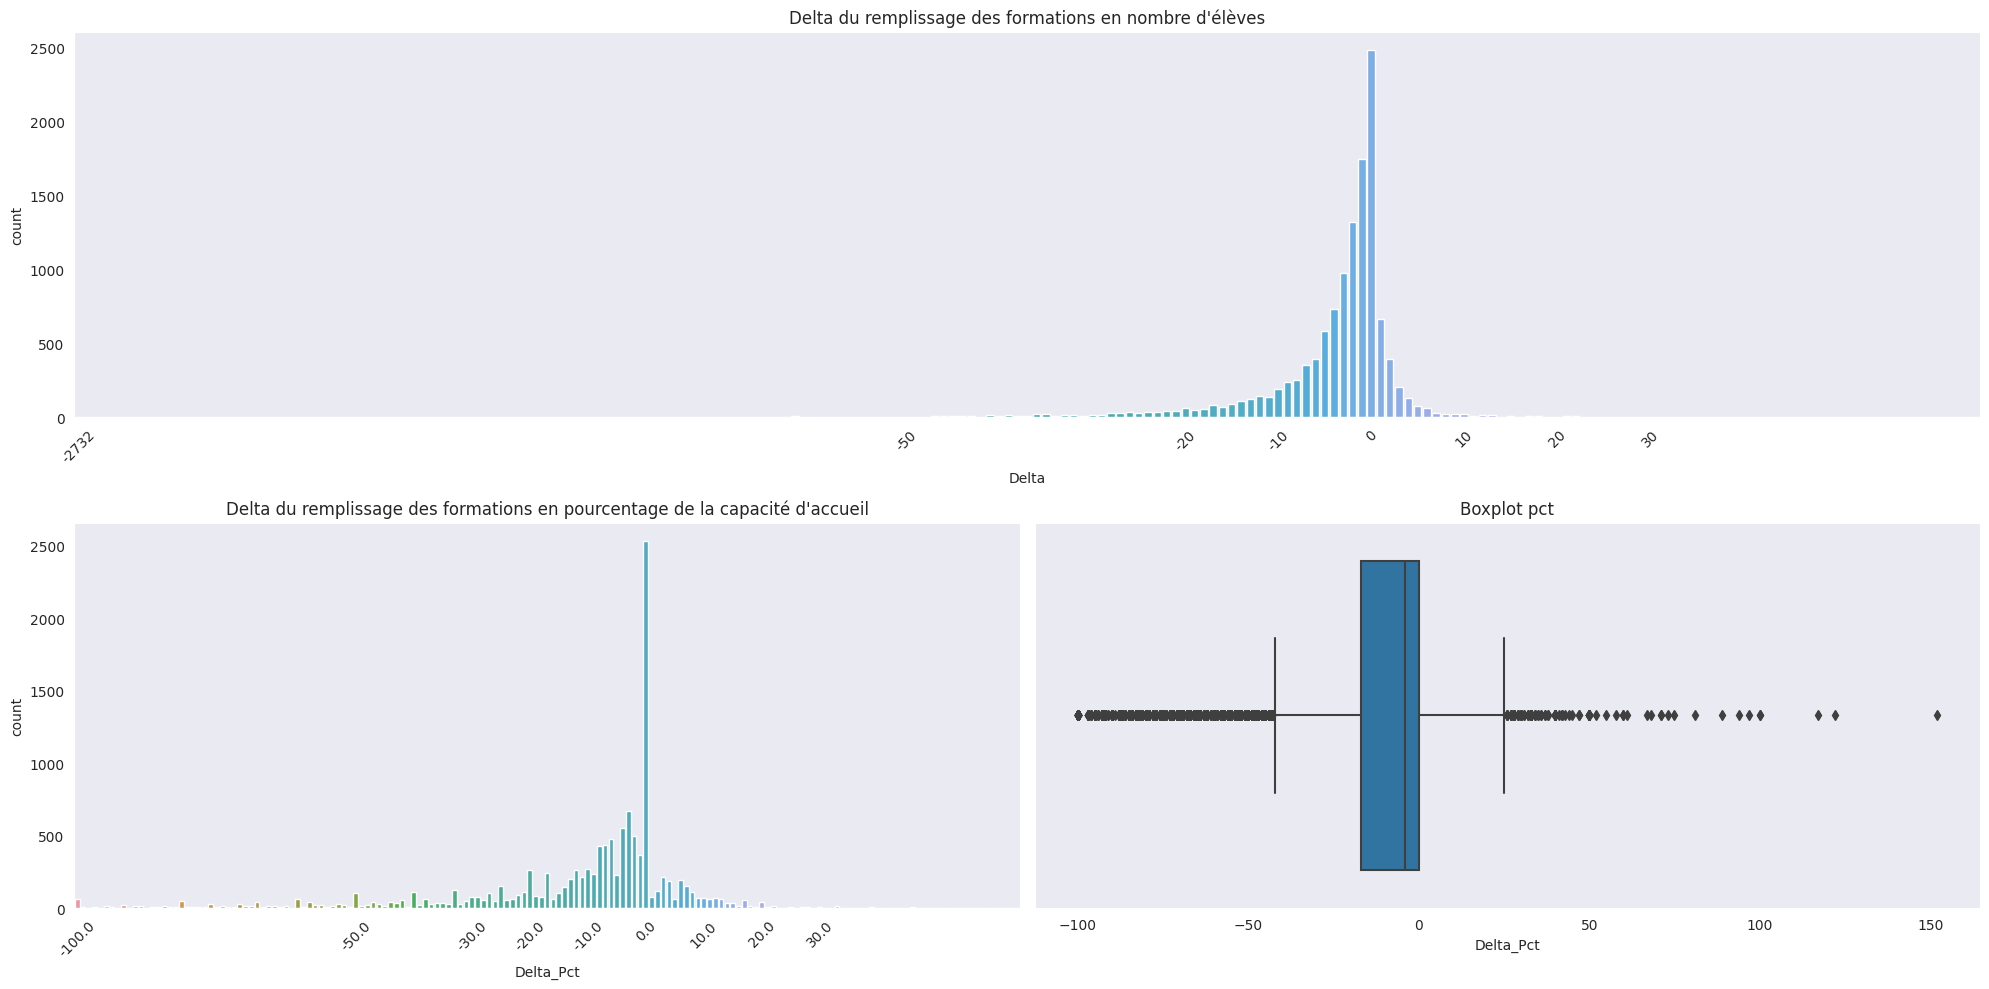

In [69]:
# Visualisation de la distribution des deltas en nombre d'élèves et pourcentage par rapport à la capacité d'acceuil
fig = plt.figure(figsize = (20,10))

# Creation d'une grille 2 par 2
gs = fig.add_gridspec(2, 2)

# Creation des subplot
ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])

# Visualisation en capacité d'élèves
sns.countplot(ax=ax1, data=remplissage, x='Delta')
ax1.set_xticks(ticks=[0, 89, 119, 129, 139, 149, 159, 169])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
ax1.set_title("Delta du remplissage des formations en nombre d'élèves")

# Countplot du pourcentage par rapport à la capacité d'accueil
sns.countplot(ax=ax2, data=remplissage, x='Delta_Pct')
ax2.set_xticks(ticks=[0, 48, 68, 78, 88, 98, 108, 118, 128])
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)
ax2.set_title("Delta du remplissage des formations en pourcentage de la capacité d'accueil")

# Boxplot du pourcentage par rapport à la capacité d'accueil
sns.boxplot(ax=ax3, data=remplissage, x='Delta_Pct')
ax3.set_title("Boxplot pct")

plt.tight_layout()
plt.show()

🔎 Le taux de remplissage est autour de 0 donc les formations sont a priori remplies équitablement.

Groupage des pourcentages par seuils:
- Pas de candidats : -100%
- Sous_eff_important : -99% à -20%
- Sous_eff_moderé: -20% à -1%
- Optimal: 0%
- Sur_eff_moderé: 1% à 20%
- Sur_eff_important: 21% à 99%
- Effectif_double: + 100%

In [70]:
def deg_rempl(row):
  if (row['Delta_Pct'] >= -99) & (row['Delta_Pct'] < -20):
    val = 'Sous_eff_important [-99%; -20%]'
  elif (row['Delta_Pct'] >= -20) & (row['Delta_Pct'] < 0):
    val = 'Sous_eff_moderé [-20%; -1%]'
  elif row['Delta_Pct'] == 0:
    val = 'Optimal [0%]'
  elif (row['Delta_Pct'] > 0) & (row['Delta_Pct'] <= 20):
    val = 'Sur_eff_moderé [1%; 20%]'
  elif (row['Delta_Pct'] > 20) & (row['Delta_Pct'] <= 99):
    val = 'Sur_eff_important [21%; 99%]'
  elif row['Delta_Pct'] == -100:
    val = 'Pas de candidats'
  else:
    val = 'Effectif_double [100% +]'
  return val

In [71]:
# Détail par tranche
remplissage['Tranche_Pct'] = remplissage.apply(deg_rempl, axis=1)
remplissage['Tranche_Pct'].value_counts()

Sous_eff_moderé [-20%; -1%]        5844
Optimal [0%]                       2534
Sous_eff_important [-99%; -20%]    2493
Sur_eff_moderé [1%; 20%]           1676
Sur_eff_important [21%; 99%]        143
Pas de candidats                     64
Effectif_double [100% +]              5
Name: Tranche_Pct, dtype: int64

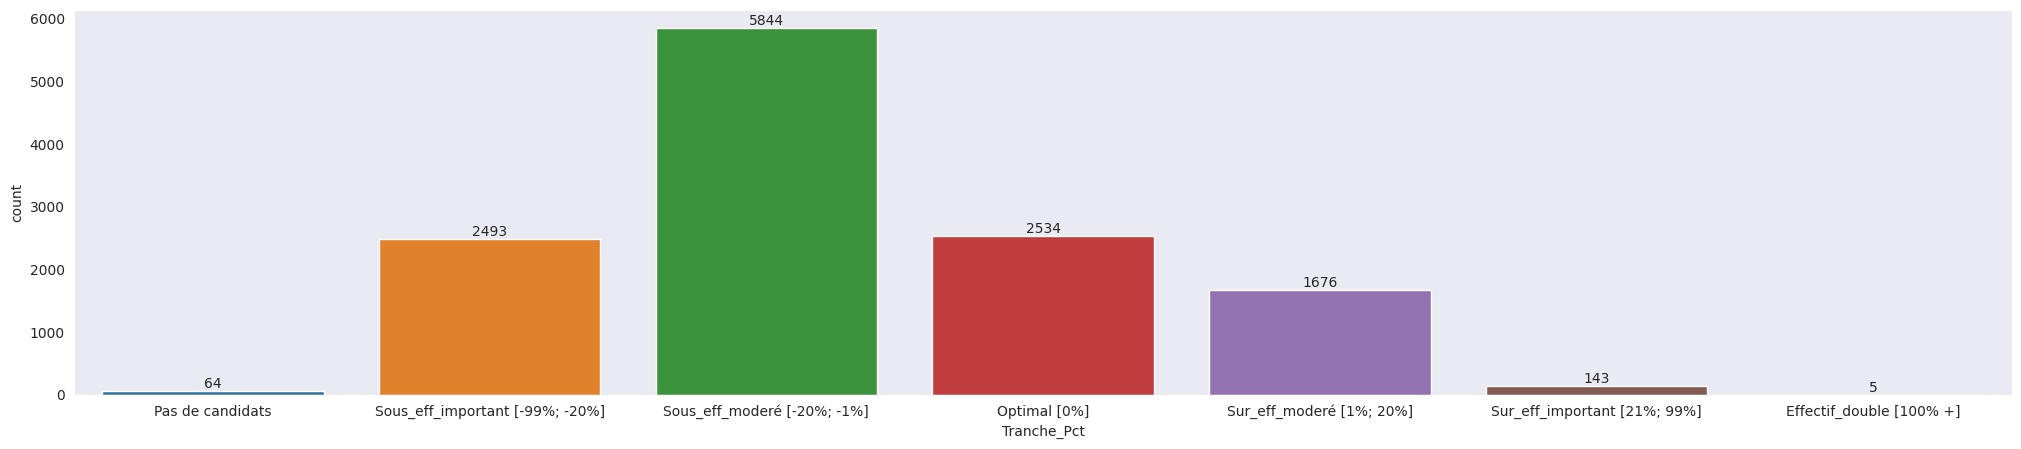

In [72]:
plt.figure(figsize=(25, 5))
order = ['Pas de candidats', 'Sous_eff_important [-99%; -20%]', 'Sous_eff_moderé [-20%; -1%]', 'Optimal [0%]', 'Sur_eff_moderé [1%; 20%]', 'Sur_eff_important [21%; 99%]', 'Effectif_double [100% +]']
ax = sns.countplot(data=remplissage, x='Tranche_Pct', order = order)


# Afficher les valeurs au-dessus de chaque barre
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

plt.show()

**Insights**

Formations en sous effectifs:

- Malgré le fait que 66% des formations soient concernées, la majorité le sont en entre -1% et -20% de leur capacité d'acceuil.

- 64 formations n'ont pas d'élèves

Formations en sur effectifs:
- 5 Formations on un effectif double par rapport à leur capacité d'acceuil
- 143 sont en sur effectif important



## Test GEO

In [73]:
'''map = px.scatter_geo(licences, lat='GPS_X', lon = 'GPS_Y', fitbounds='locations',size='Admis_Total', width= 750, height=400)
map.update_layout(margin={"r":0,"t":20,"l":0,"b":0},title = 'Admis', title_x=0.5, title_y = 0.98)
map.show()'''

'map = px.scatter_geo(licences, lat=\'GPS_X\', lon = \'GPS_Y\', fitbounds=\'locations\',size=\'Admis_Total\', width= 750, height=400)\nmap.update_layout(margin={"r":0,"t":20,"l":0,"b":0},title = \'Admis\', title_x=0.5, title_y = 0.98)\nmap.show()'

## EDA

In [74]:
#%pip install skimpy

#from skimpy import skim



In [75]:
#pip install ydata-profiling

In [76]:
'''from ydata_profiling import ProfileReport

# Creating the profile without specifying the data source, to allow editing the configuration
ProfileReport(remplissage.loc[:, ['Admis_Total', 'Capacite', 'Delta','Delta_Pct']], title="Pandas Profiling Report")'''

'from ydata_profiling import ProfileReport\n\n# Creating the profile without specifying the data source, to allow editing the configuration\nProfileReport(remplissage.loc[:, [\'Admis_Total\', \'Capacite\', \'Delta\',\'Delta_Pct\']], title="Pandas Profiling Report")'